# Metropolis Hastings algorithm

## Independence sampler

In [1]:
using Distributions
using CairoMakie
using Random

### Samples from a mixture.

We will use independence sampler to obtain realization from a mixture distribution.

In [2]:
J(x) = exp(-(x+1)^2/2) + exp(-(x-4)^2/8) / 2

J (generic function with 1 method)

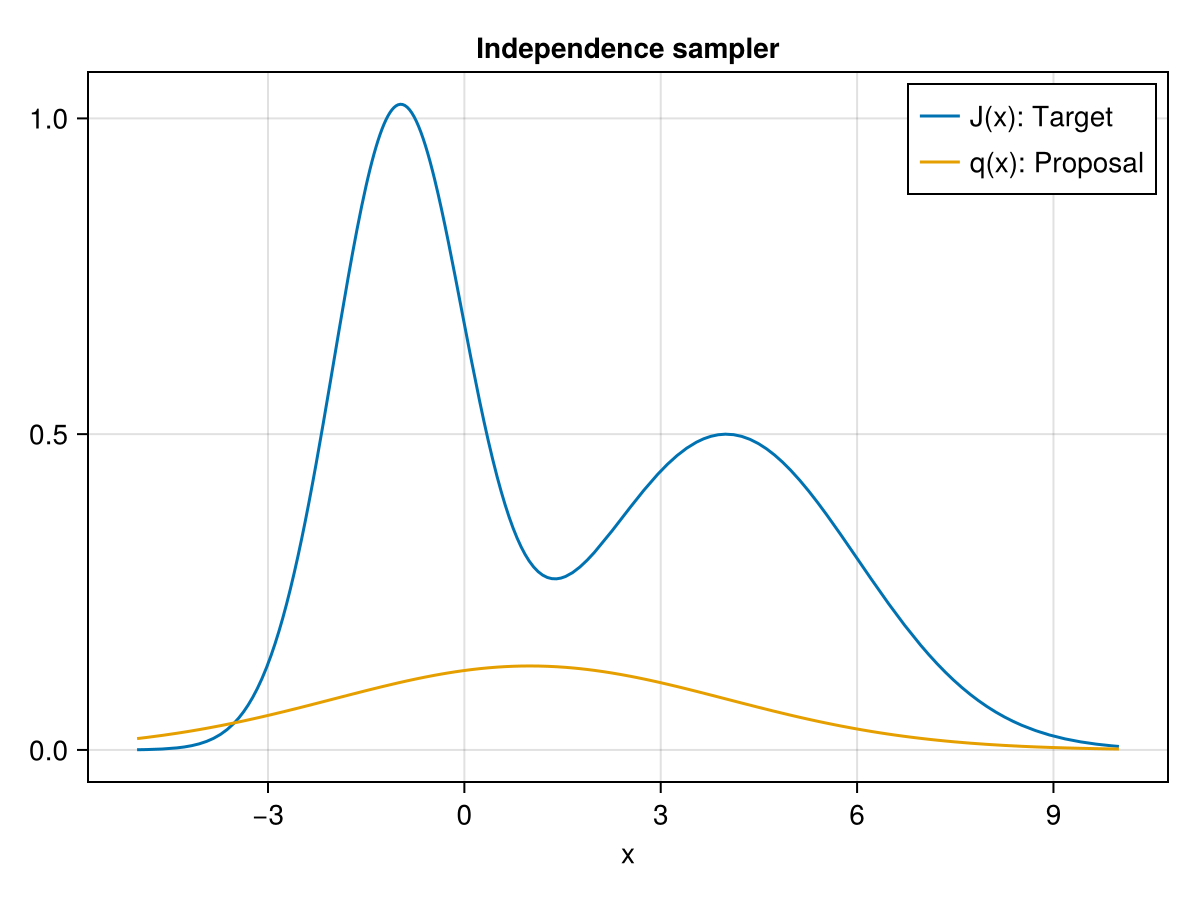

In [3]:
axis_args = (title = "Independence sampler", xlabel = "x")
lines(-5..10, J, label = "J(x): Target", axis = axis_args)
lines!(-5..10, x -> pdf(Normal(1, 3), x), label = "q(x): Proposal")
axislegend()
current_figure()

Let's create a custom function for this example.

In [4]:
function independence_mixture(m::Int, q::Distribution)
    samples = zeros(m)

    # initial values
    x = rand(q)

    # conditional distributions
    for i = 1:m
        y = rand(q)
        logp = min(log(J(y)) + log(pdf(q, x)) - log(J(x)) - log(pdf(q, y)), 0)
        if rand() <= exp(logp)
            x = y
        end
        samples[i] = x
    end

    return samples
end

independence_mixture (generic function with 1 method)

#### Adequate proposal function

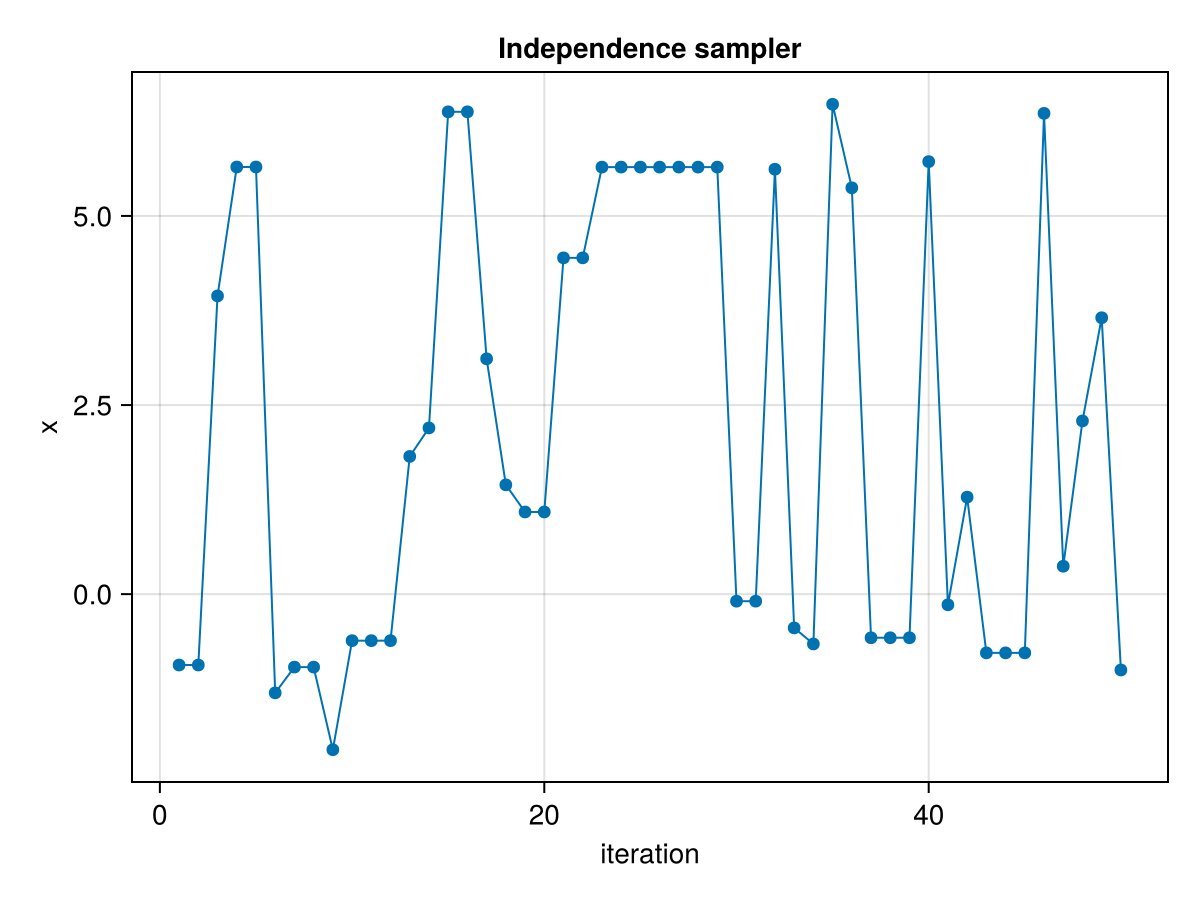

In [5]:
Random.seed!(123)
samples = independence_mixture(50, Normal(1, 3))
axis_args = (title = "Independence sampler", xlabel = "iteration", ylabel = "x")
lines(samples, linewidth = 1, axis = axis_args)
scatter!(samples)
current_figure()

Let's check convergence in the long run.

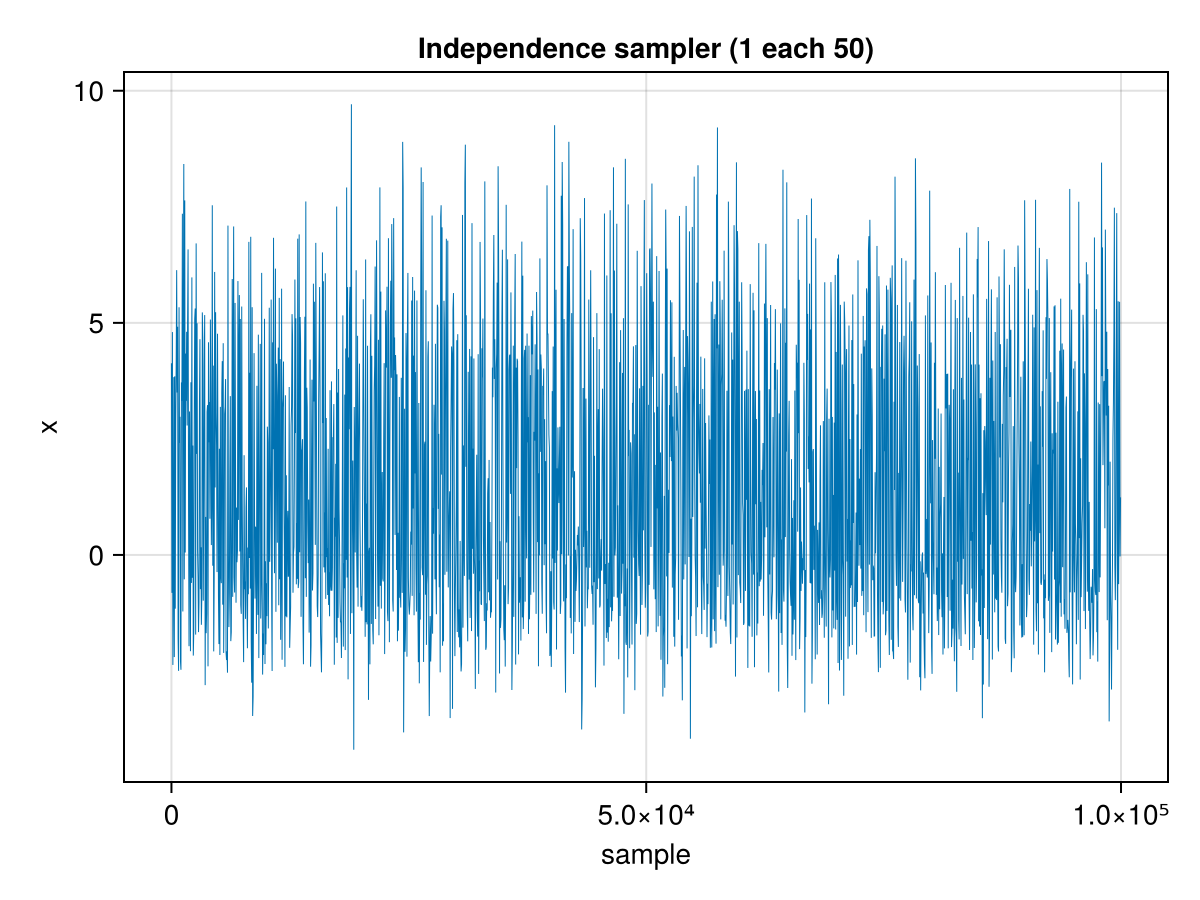

In [6]:
niter = 100000
samples = independence_mixture(niter, Normal(1, 3))
axis_args = (title = "Independence sampler (1 each 50)", xlabel = "sample", ylabel = "x")
lines(1:50:niter, samples[1:50:end], linewidth = 0.5, axis = axis_args)
current_figure()
# savefig("data/figures/08-independence-traceplot.png")

We can see that the realizations have the shape of a bimodal distribution.

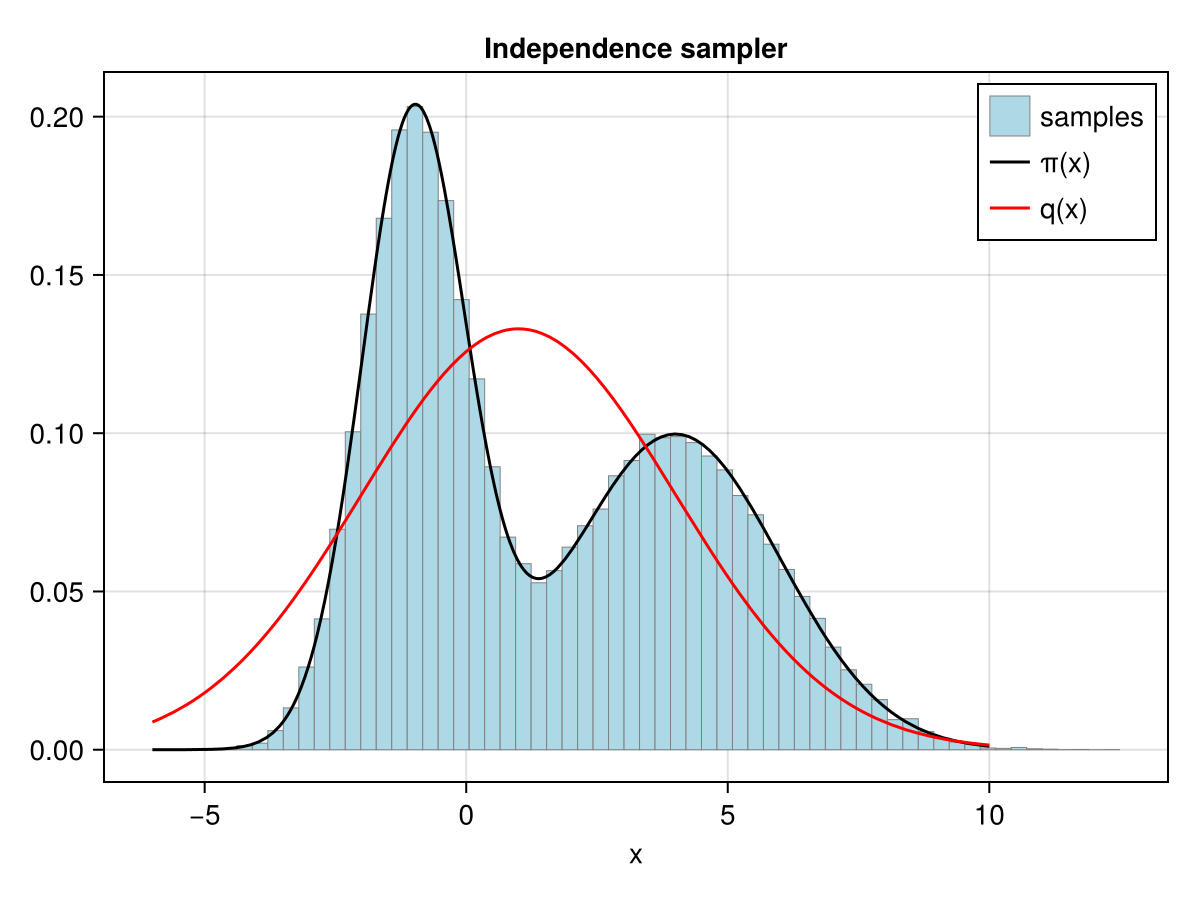

In [7]:
hist(samples[20000:niter], bins = 60, normalization = :pdf, strokewidth = 0.5,
    strokecolor = :gray, color = :lightblue,
    label = "samples", axis = (title = "Independence sampler", xlabel = "x"))
fx = MixtureModel([Normal(-1,1), Normal(4, 2)], [0.5, 0.5])
lines!(-6..10, x -> pdf(fx, x), color = :black, label = "π(x)")
lines!(-6..10, x -> pdf(Normal(1, 3), x), color = :red, label = "q(x)")
axislegend()
current_figure()
# savefig("data/figures/08-independence-histogram.png")

#### Non-adequate proposal function

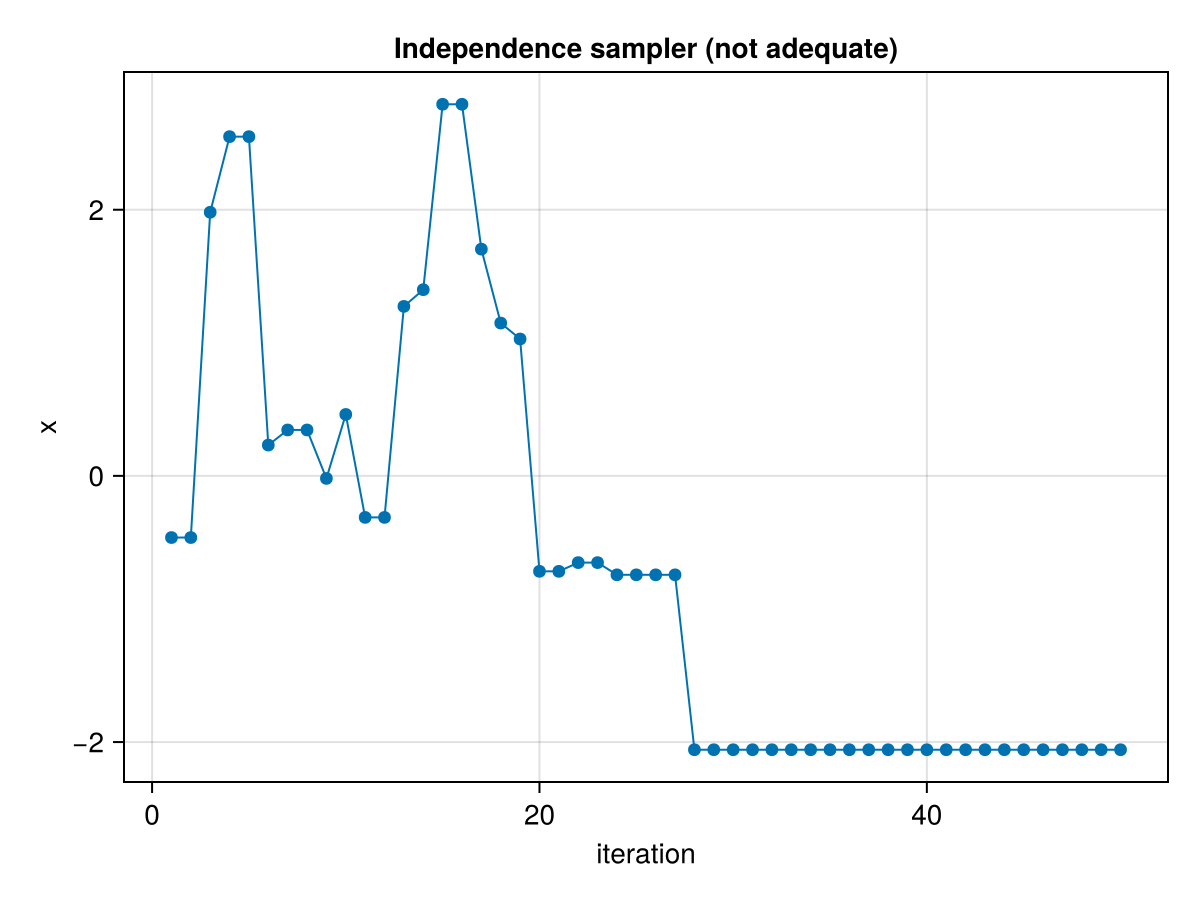

In [8]:
Random.seed!(123)
samples = independence_mixture(50, Normal(1, 1))
axis_args = (title = "Independence sampler (not adequate)", xlabel = "iteration",
    ylabel = "x")
lines(samples, linewidth = 1, axis = axis_args)
scatter!(samples)
current_figure()

Let's check convergence in the long run.

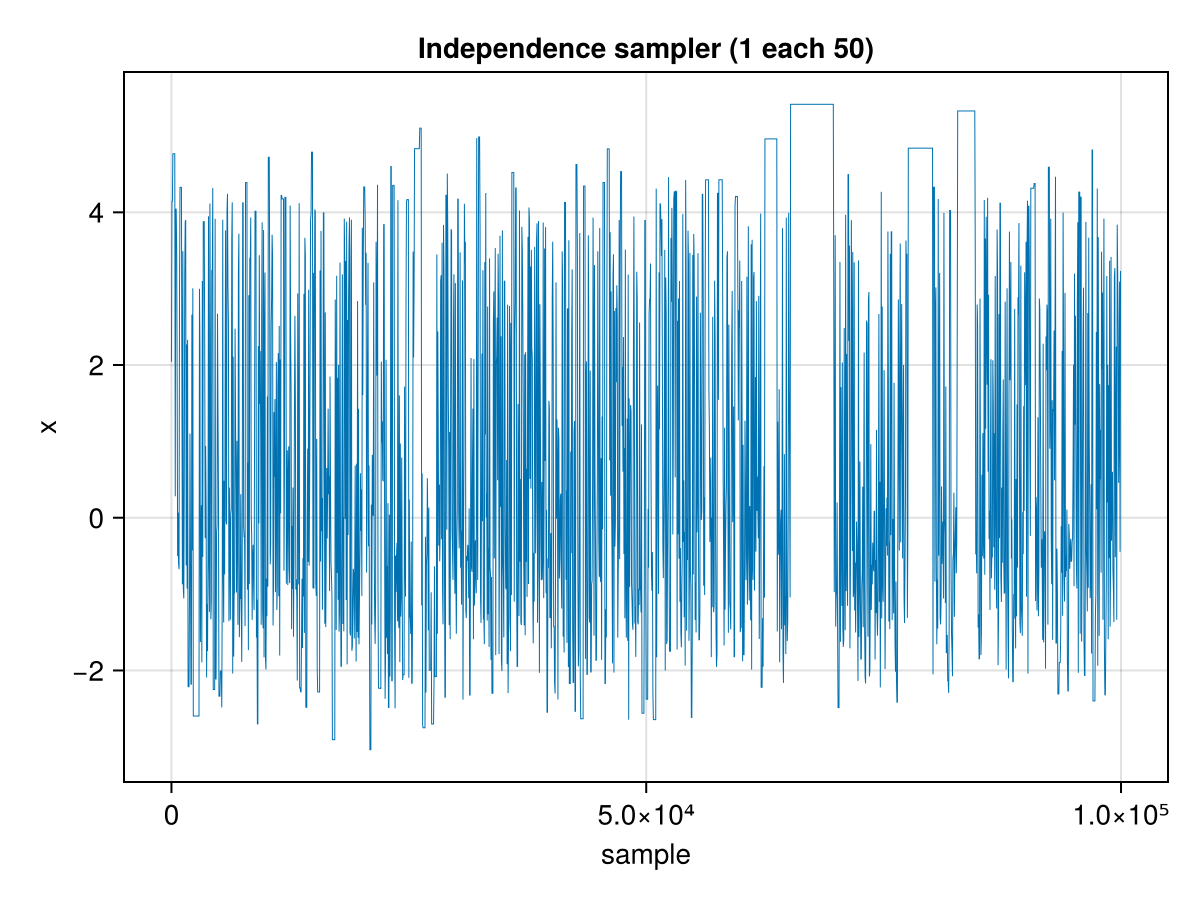

In [9]:
niter = 100000
samples = independence_mixture(niter, Normal(1, 1))
axis_args = (title = "Independence sampler (1 each 50)", xlabel = "sample", ylabel = "x")
lines(1:50:niter, samples[1:50:end], linewidth = 0.5, axis = axis_args)
current_figure()

We can see that the realizations have the shape of a bimodal distribution.

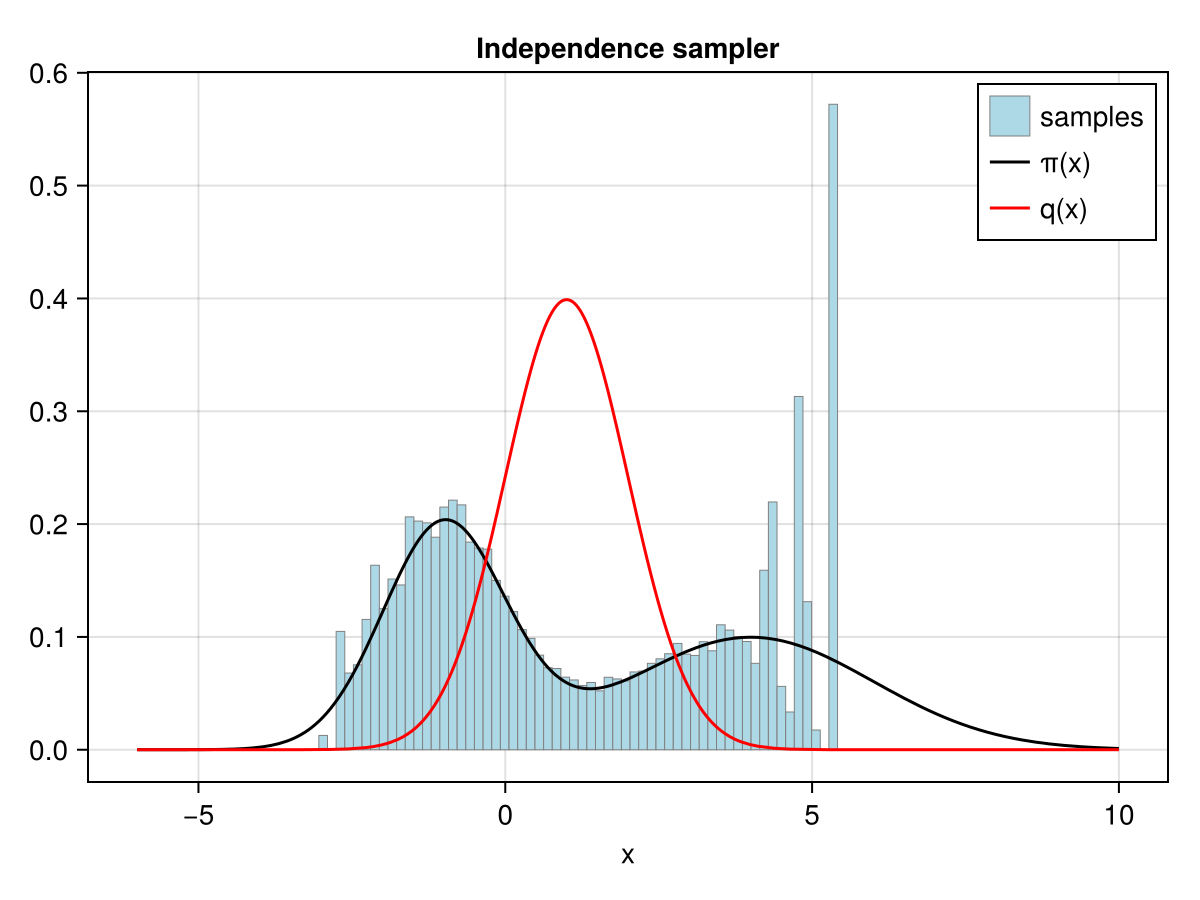

In [10]:
hist(samples[20000:niter], bins = 60, normalization = :pdf, strokewidth = 0.5,
    strokecolor = :gray, color = :lightblue,
    label = "samples", axis = (title = "Independence sampler", xlabel = "x"))
fx = MixtureModel([Normal(-1,1), Normal(4, 2)], [0.5, 0.5])
lines!(-6..10, x -> pdf(fx, x), color = :black, label = "π(x)")
lines!(-6..10, x -> pdf(Normal(1, 1), x), color = :red, label = "q(x)")
axislegend()
current_figure()
# savefig("data/figures/08-independence-histogram.png")

## Bayesian species modelling

### Sampler

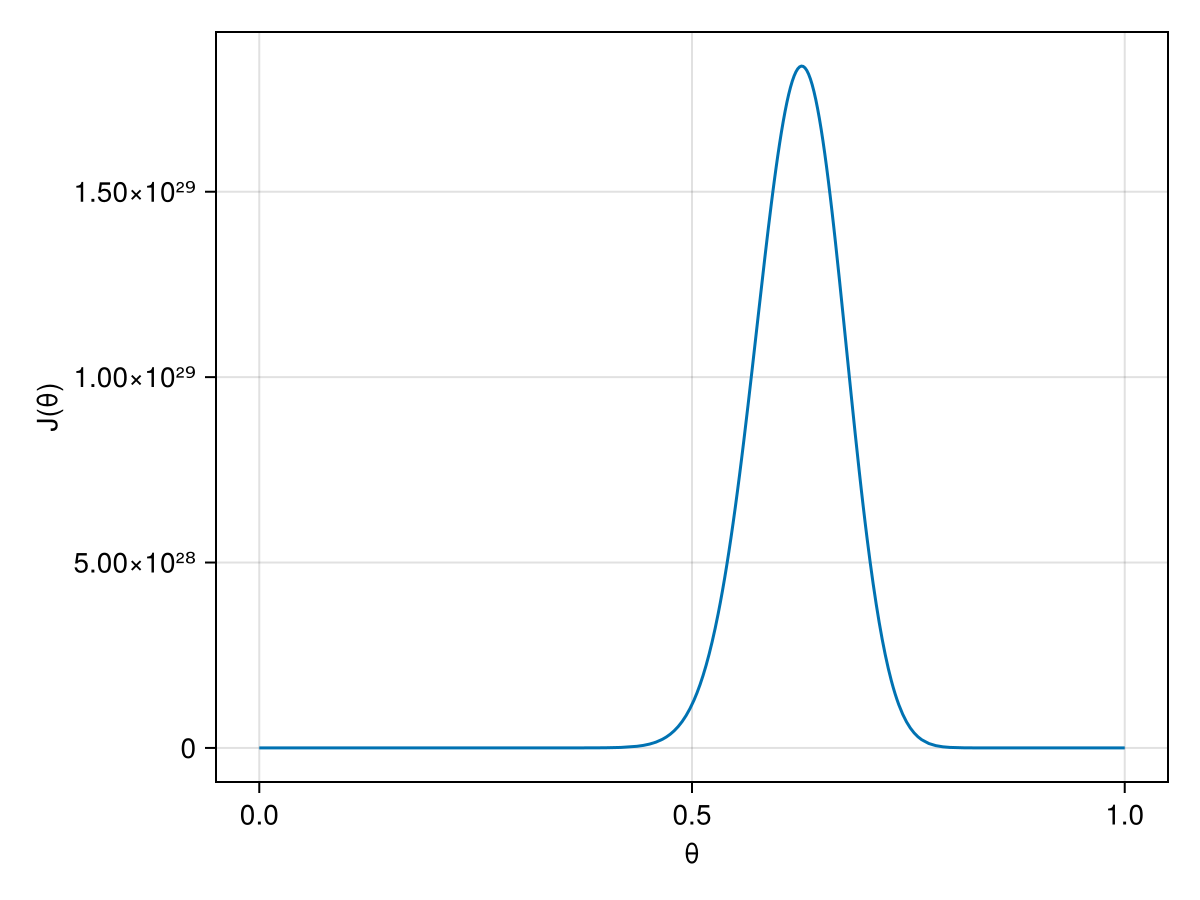

In [11]:
x = [125, 18, 20, 34]
logJ(θ) = x[1] * log(2 + θ) + (x[2] + x[3]) * log(1 - θ) + x[4] * log(θ)
lines(0..1, x -> exp(logJ(x)), axis = (;xlabel = "θ", ylabel = "J(θ)"))

Let's create a custom function for this example.

In [12]:
function independence_species(m::Int, q::Distribution)
    samples = zeros(m)

    # initial values
    θ = rand(q)

    # conditional distributions
    for i = 1:m
        y = rand(q)
        logp = min(logJ(y) + log(pdf(q, θ)) - logJ(θ) - log(pdf(q, y)), 0)
        if rand() <= exp(logp)
            θ = y
        end
        samples[i] = θ
    end

    return samples
end

independence_species (generic function with 1 method)

### Traceplots

In [13]:
Random.seed!(111)
niter = 1000
samples1 = independence_species(niter, Beta(1, 1))
samples2 = independence_species(niter, Beta(6, 4))
samples3 = independence_species(niter, Beta(1, 4))

1000-element Vector{Float64}:
 0.38473612905842763
 0.38473612905842763
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 0.4029555577735584
 ⋮
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448
 0.6209137700715448

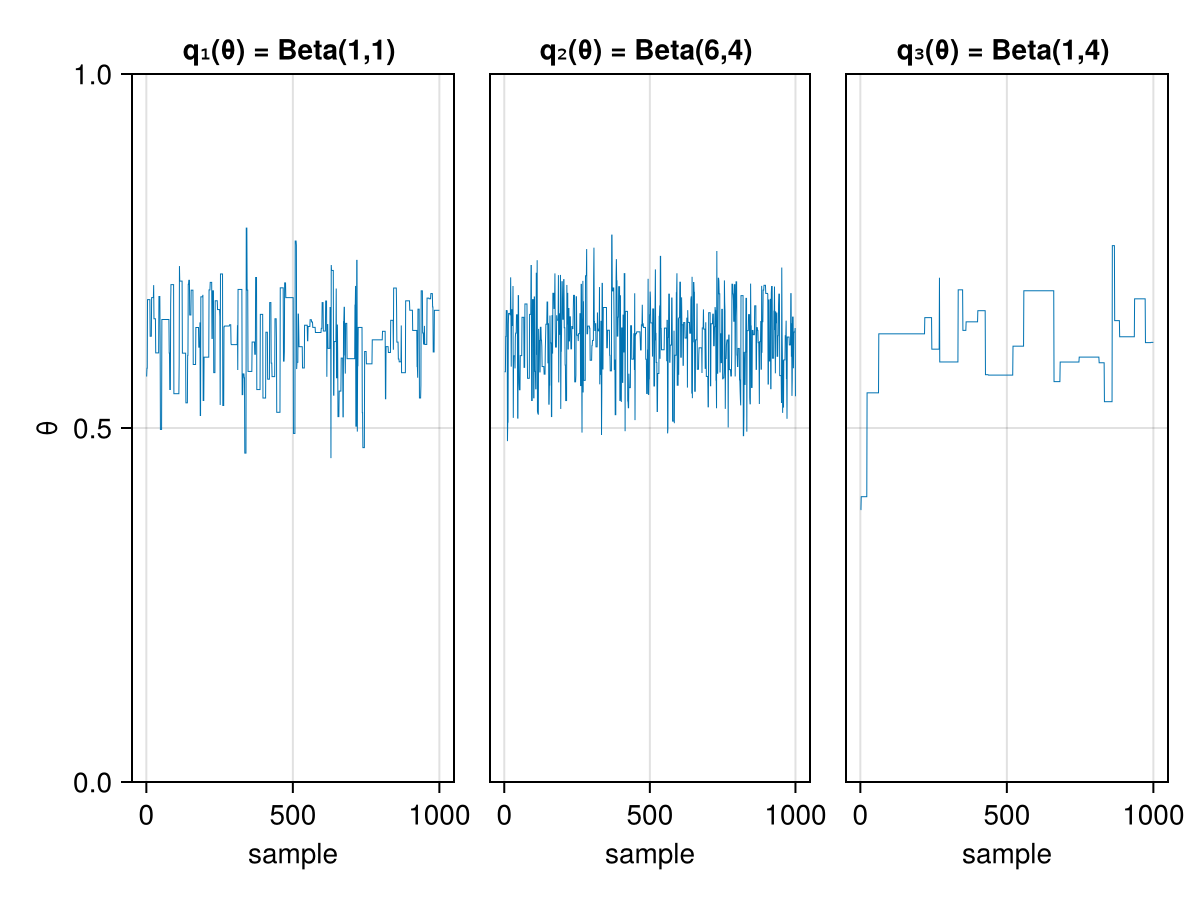

In [14]:
fig = Figure()
ax1 = Axis(fig[1,1], title = "q₁(θ) = Beta(1,1) ", xlabel = "sample", ylabel = "θ")
lines!(ax1, 1:niter, samples1, linewidth = 0.5)
ax2 = Axis(fig[1,2], title = "q₂(θ) = Beta(6,4) ", xlabel = "sample", ylabel = "θ")
lines!(ax2, 1:niter, samples2, linewidth = 0.5)
ax3 = Axis(fig[1,3], title = "q₃(θ) = Beta(1,4) ", xlabel = "sample", ylabel = "θ")
lines!(ax3, 1:niter, samples3, linewidth = 0.5)
ylims!.([ax1, ax2, ax3], 0, 1)
hideydecorations!.([ax2, ax3], grid = false)
current_figure()

### Posterior density

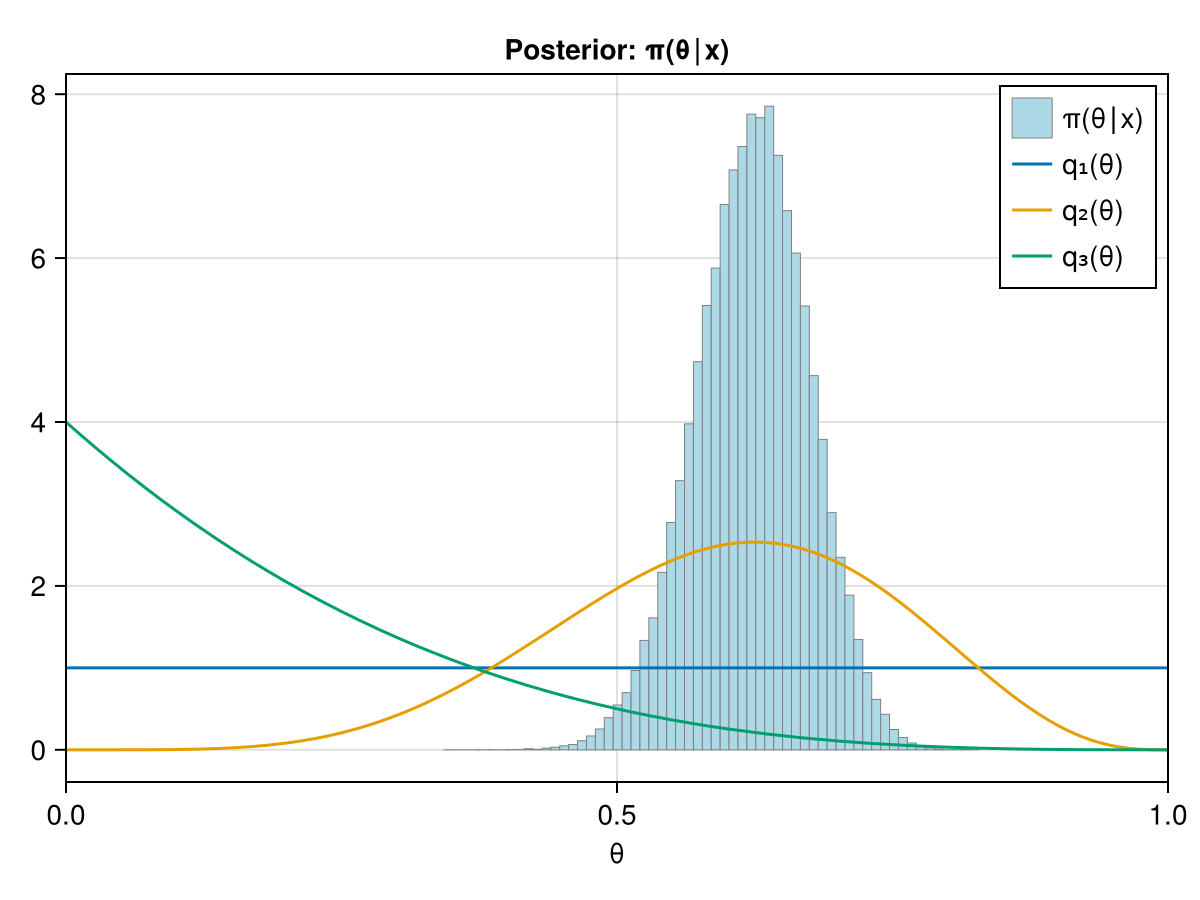

In [15]:
Random.seed!(123)
niter = 300000
samples = independence_species(niter, Beta(6, 4))
hist(samples[20000:niter], bins = 60, normalization = :pdf, strokewidth = 0.5,
    strokecolor = :gray, color = :lightblue,
    label = "π(θ∣x)", axis = (title = "Posterior: π(θ∣x)", xlabel = "θ"))
lines!(0..1, x -> pdf(Beta(1, 1), x), label = "q₁(θ)")
lines!(0..1, x -> pdf(Beta(6, 4), x), label = "q₂(θ)")
lines!(0..1, x -> pdf(Beta(1, 4), x), label = "q₃(θ)")
xlims!(0, 1)
axislegend()
current_figure()

Summarise results:

In [16]:
samples = samples[20000:niter]
mean(samples)

0.6228935397597334

In [17]:
α = 0.05
quantile(samples, [α/2, 0.5, 1-α/2])

3-element Vector{Float64}:
 0.5188792835530252
 0.6244456155511718
 0.7194585301153767

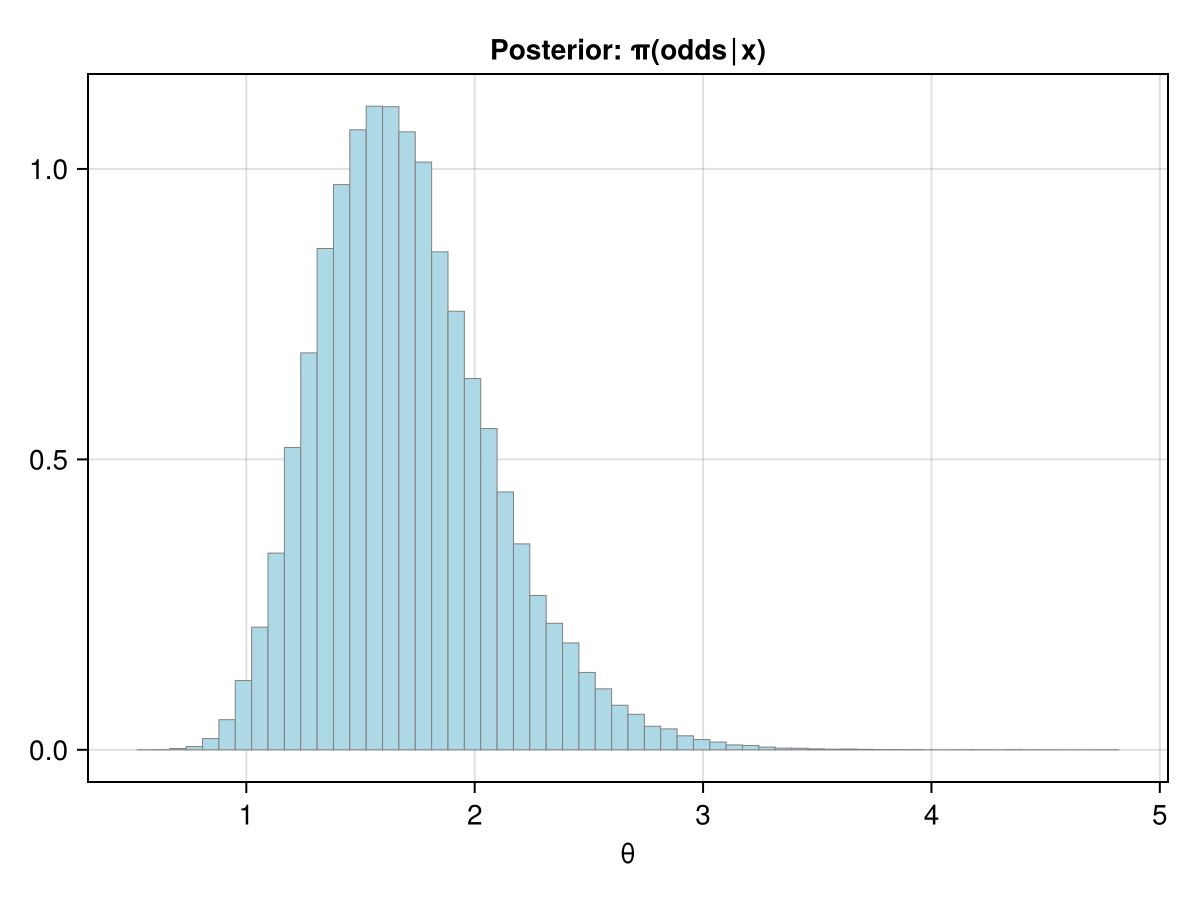

In [18]:
odds = samples ./ (1 .- samples)
hist(odds, bins = 60, normalization = :pdf, strokewidth = 0.5,
    strokecolor = :gray, color = :lightblue,
    axis = (title = "Posterior: π(odds∣x)", xlabel = "θ"))

In [19]:
mean(odds)

1.702463305804416

In [20]:
quantile(odds, [α/2, 0.5, 1-α/2])

3-element Vector{Float64}:
 1.0784804432968367
 1.6627301967666333
 2.564535397961893

## Random walk Metropolis-Hastings

In [21]:
using Distributions
using CairoMakie
using Random
using LinearAlgebra

### Samples from a mixture.

We will use Metropolis-Hastings to obtain realization from a mixture distribution.

In [22]:
J(x) = exp(-(x+1)^2/2) + exp(-(x-4)^2/8) / 2

J (generic function with 1 method)

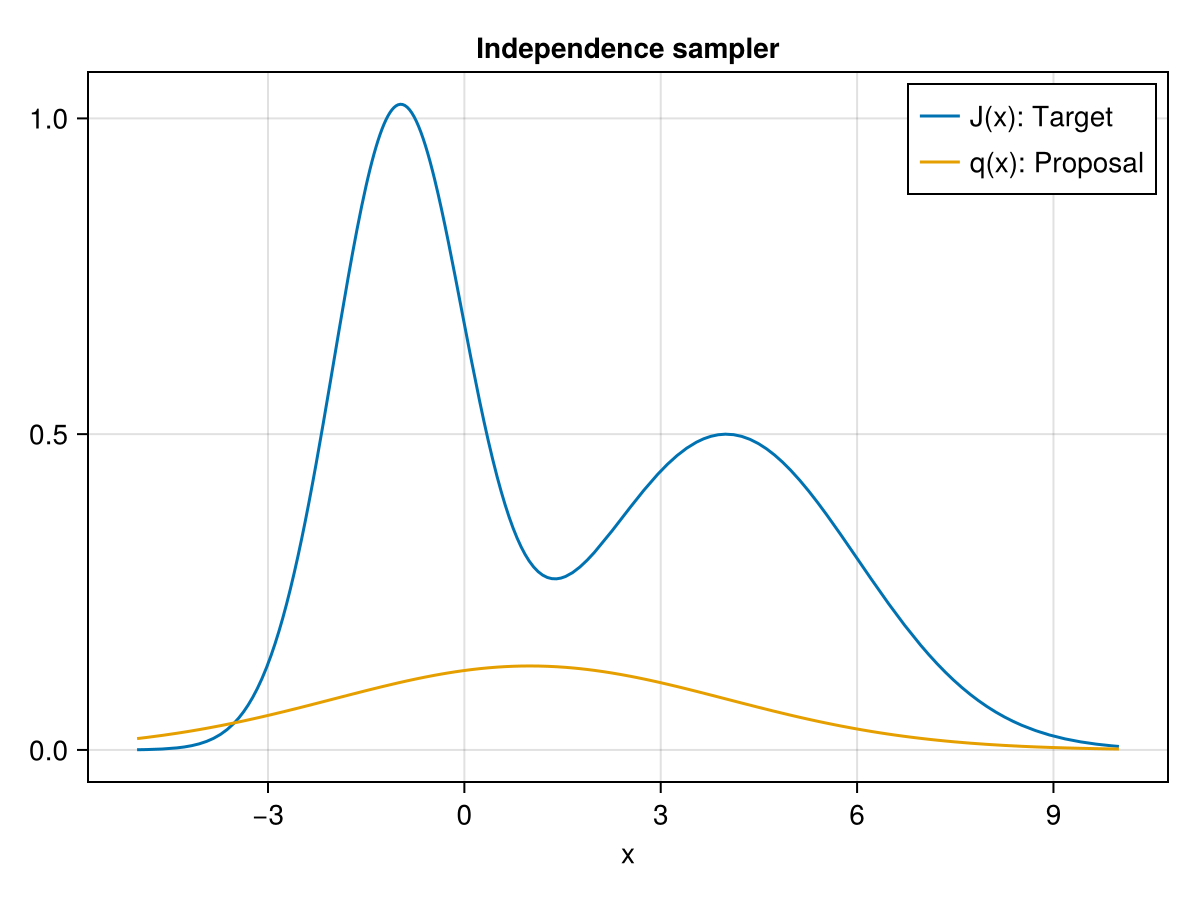

In [23]:
axis_args = (title = "Independence sampler", xlabel = "x")
lines(-5..10, J, label = "J(x): Target", axis = axis_args)
lines!(-5..10, x -> pdf(Normal(1, 3), x), label = "q(x): Proposal")
axislegend()
current_figure()

Let's create a custom function for this example.

In [24]:
function randomwalk_mixture(q::Function, m::Int, initial::Float64)
    samples = zeros(m)

    # initial values
    x = initial

    # sampling
    for i = 1:m
        y = rand(q(x))
        logp = min(log(J(y)) - log(J(x)), 0)
        if rand() <= exp(logp)
            x = y
        end
        samples[i] = x
    end

    return samples
end

randomwalk_mixture (generic function with 1 method)

#### Sampling behaviour

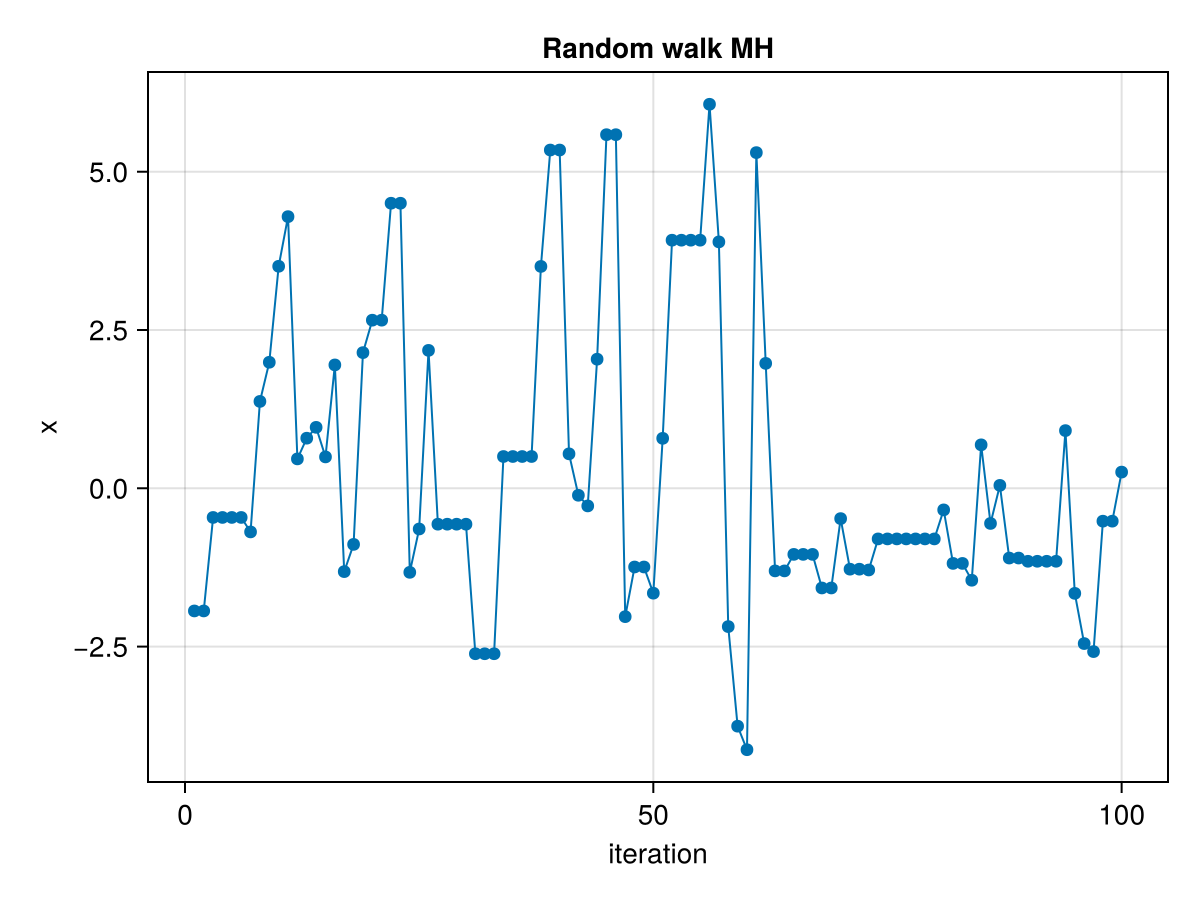

In [25]:
Random.seed!(123)
samples = randomwalk_mixture(x -> Normal(x, 3), 100, 0.0)
axis_args = (title = "Random walk MH", xlabel = "iteration",
    ylabel = "x")
lines(samples, linewidth = 1, axis = axis_args)
scatter!(samples)
current_figure()

Let's check convergence in the long run.

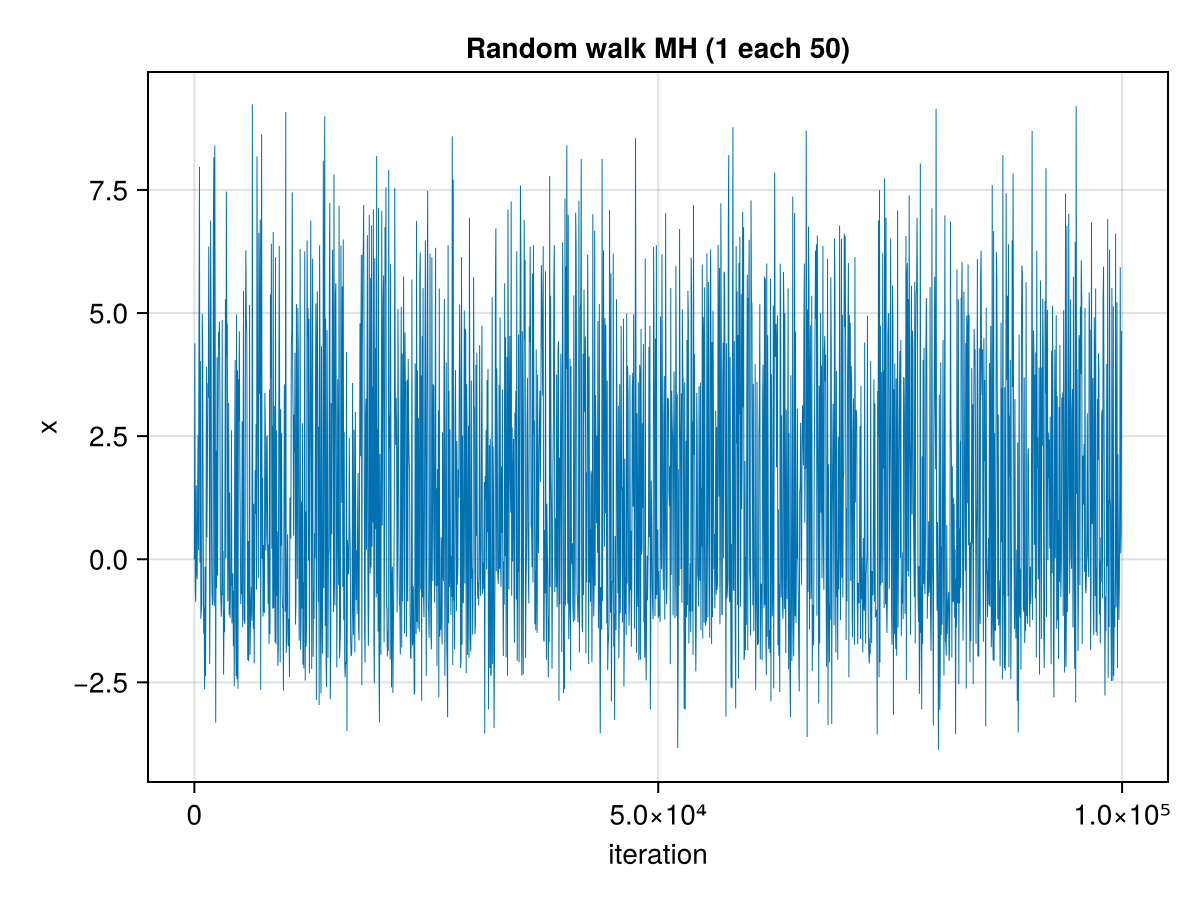

In [26]:
niter = 100000
samples = randomwalk_mixture(x -> Normal(x, 3), niter, 0.0)
axis_args = (title = "Random walk MH (1 each 50)", xlabel = "iteration", ylabel = "x")
lines(1:50:niter, samples[1:50:end], linewidth = 0.5, axis = axis_args)
current_figure()

We can see that the realizations have the shape of a bimodal distribution.

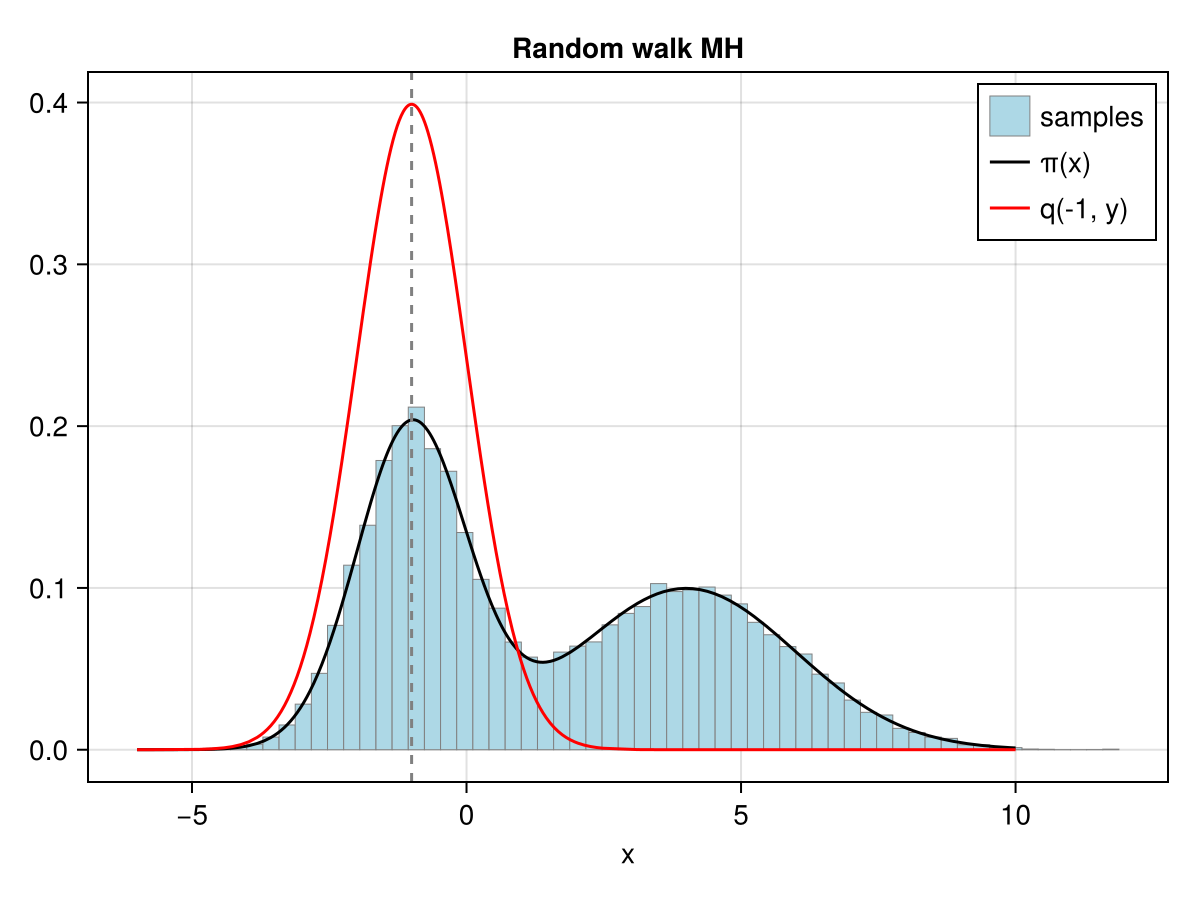

In [27]:
hist(samples[20000:niter], bins = 60, normalization = :pdf, strokewidth = 0.5,
    strokecolor = :gray, color = :lightblue,
    label = "samples", axis = (title = "Random walk MH", xlabel = "x"))
fx = MixtureModel([Normal(-1,1), Normal(4, 2)], [0.5, 0.5])
lines!(-6..10, x -> pdf(fx, x), color = :black, label = "π(x)")
lines!(-6..10, x -> pdf(Normal(-1, 1), x), color = :red, label = "q(-1, y)")
vlines!([-1], color = :gray, linestyle = :dash)
axislegend()
current_figure()

#### Proposals comparison

In [28]:
Random.seed!(111)
niter = 100
samples1 = randomwalk_mixture(x -> Normal(x, 0.2), niter, 0.0)
samples2 = randomwalk_mixture(x -> Normal(x, 4), niter, 0.0)
samples3 = randomwalk_mixture(x -> Normal(x, 20), niter, 0.0)

100-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  3.318961435274614
  4.224345390923962
  ⋮
 -0.6064458237639428
 -0.6064458237639428
 -0.6064458237639428
 -0.6064458237639428
 -0.6064458237639428
 -0.6064458237639428
  3.5833266356660483
  3.5833266356660483
  3.5833266356660483

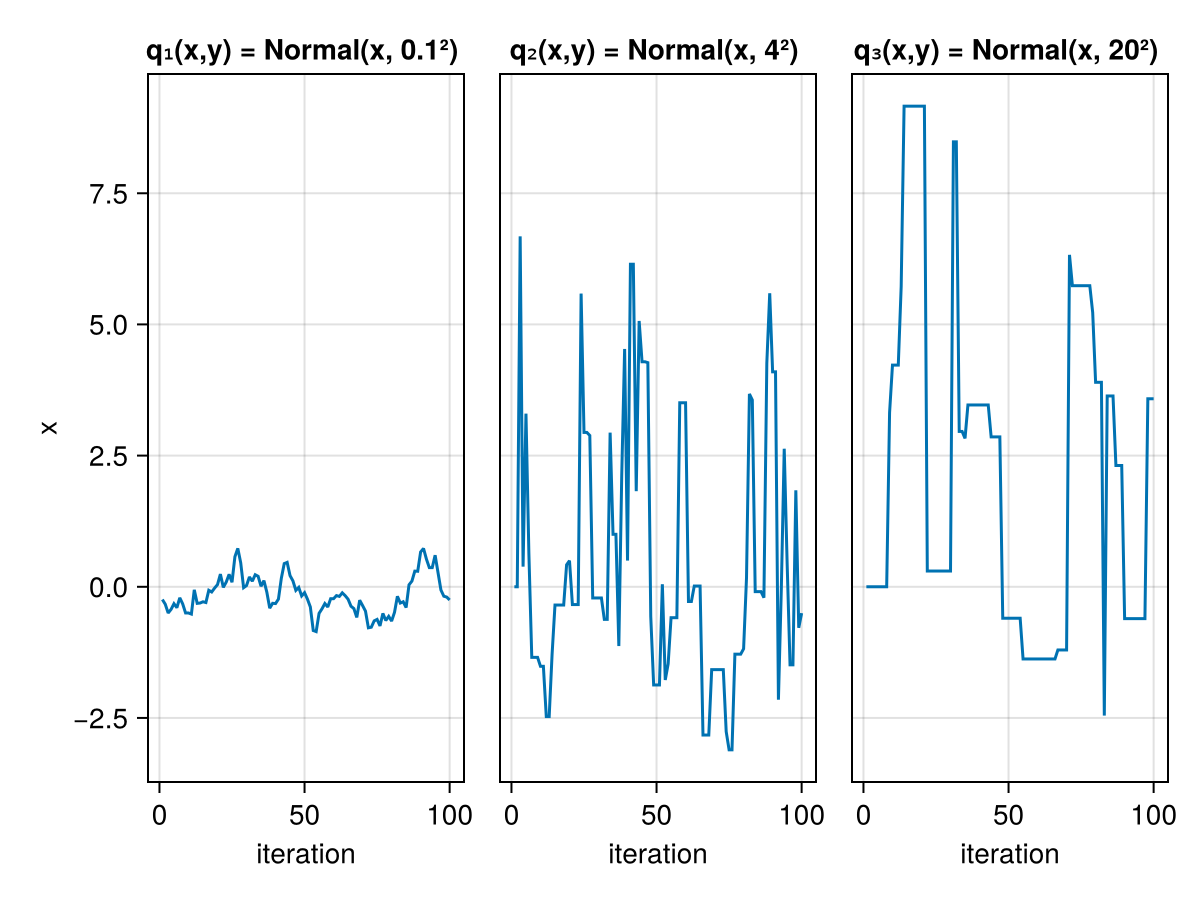

In [29]:
fig = Figure()
ax1 = Axis(fig[1,1], title = "q₁(x,y) = Normal(x, 0.1²) ", xlabel = "iteration", ylabel = "x")
lines!(ax1, 1:niter, samples1)
ax2 = Axis(fig[1,2], title = "q₂(x,y) = Normal(x, 4²) ", xlabel = "iteration", ylabel = "x")
lines!(ax2, 1:niter, samples2)
ax3 = Axis(fig[1,3], title = "q₃(x,y) = Normal(x, 20²) ", xlabel = "iteration", ylabel = "x")
lines!(ax3, 1:niter, samples3)
linkaxes!([ax1, ax2, ax3])
hideydecorations!.([ax2, ax3], grid = false)
current_figure()

### Bayesian non-linear regression

Oxygen demand in a biochemical experiment with respect to incubation time.

#### Simulate data

In [30]:
Random.seed!(7)
β₁ = 213
β₂ = 0.547
t = 0:0.3:10
μ = β₁ * (1 .- exp.(-β₂* t))
y = rand.(Normal.(μ, 10))

34-element Vector{Float64}:
  -4.367936713637636
  52.09225149914346
  43.168590664661856
  94.11372002086921
  95.13319196287249
 118.24127279729844
 129.1360924664598
 154.72990876882017
 151.20905282609252
 167.34973240283415
   ⋮
 213.0202460483946
 199.06387865208757
 217.51618680273899
 209.4661825299886
 200.33064323826082
 219.84041176254982
 222.59068299483909
 206.08936083652785
 215.1610992574492

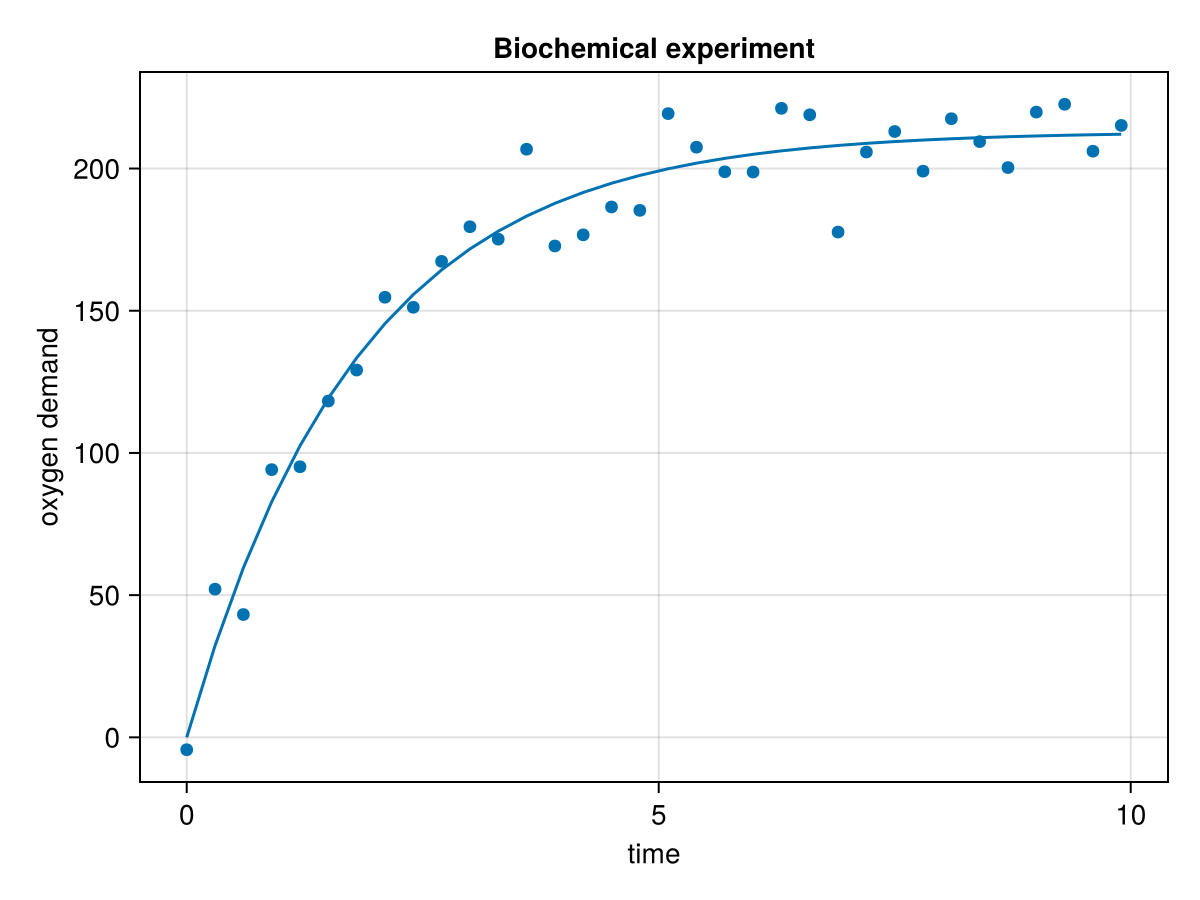

In [31]:
axis_args = (title = "Biochemical experiment", xlabel = "time", ylabel = "oxygen demand")
lines(t, μ, axis = axis_args)
scatter!(t, y)
current_figure()

In [32]:
function logpost(θ)
    # parameters are defingined in the log-scale
    β₁ = exp(θ[1])
    β₂ = exp(θ[2])
    σ = exp(θ[3])
    μ = β₁ * (1 .- exp.(-β₂* t))
    sum(logpdf.(Normal.(μ, σ), y))
end

logpost (generic function with 1 method)

Let's create a sampler.

In [33]:
function randomwalk_nonlinear(q::Function, m::Int, initial::Vector)
    samples = zeros(m, 3)

    # initial values
    θ = initial

    # sampling
    for i = 1:m
        y = rand(q(θ))
        logp = min(logpost(y) - logpost(θ), 0)
        if rand() <= exp(logp)
            θ = y
        end
        samples[i,:] = θ
    end

    return samples
end

randomwalk_nonlinear (generic function with 1 method)

In [34]:
Random.seed!(123)

Random.TaskLocalRNG()

V = 0.01 * [1 0 0; 0 1 0; 0 0 1]

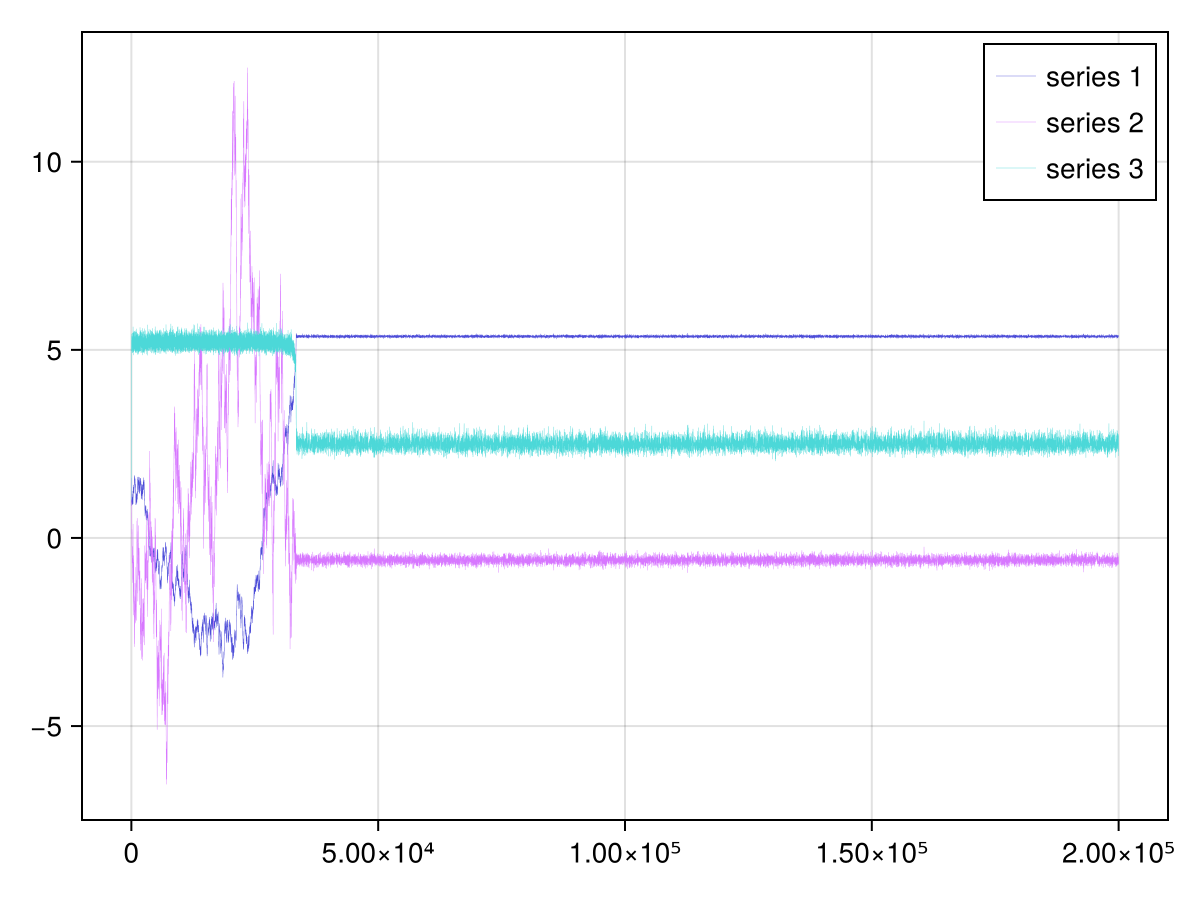

In [35]:
V = 5 * [0.28 -0.81 0.01; -0.81 4.74 0.0; 0.01 0.0 16.9] ./ 1000
samples = randomwalk_nonlinear(θ -> MvNormal(θ, V), 200000, exp.([0.0, 0, 0]))
fig, ax, sp = series(samples', linewidth = 0.2)
axislegend(ax)
fig

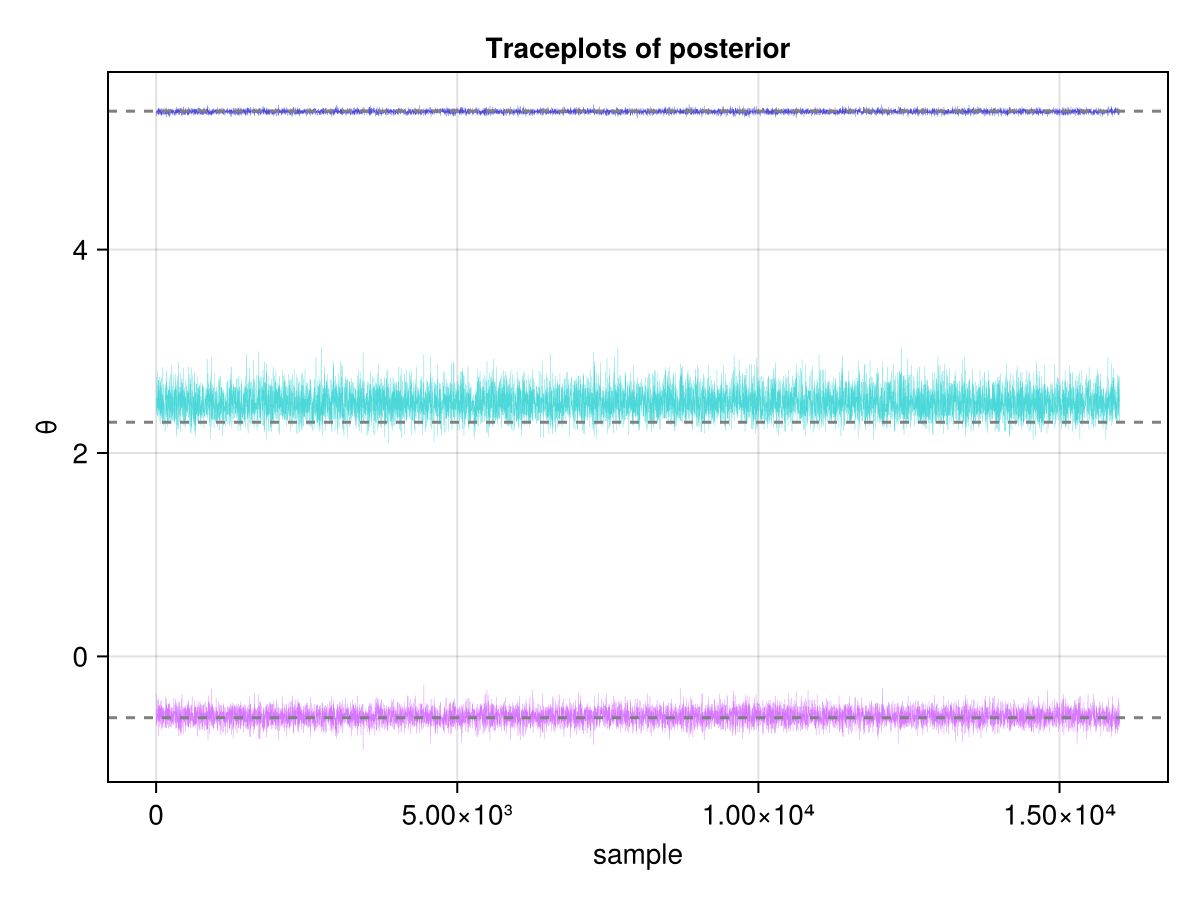

In [36]:
axis_args = (title = "Traceplots of posterior",xlabel = "sample", ylabel = "θ" )
series(samples[40000:10:end, :]', linewidth = 0.2, axis = axis_args)
hlines!([log(β₁), log(β₂), log(10)], color = :gray, linestyle = :dash)
current_figure()

In [37]:
post_samples = samples[40000:10:end, :]
cor(post_samples)

3×3 Matrix{Float64}:
  1.0         -0.720569     0.00764915
 -0.720569     1.0         -0.00285406
  0.00764915  -0.00285406   1.0

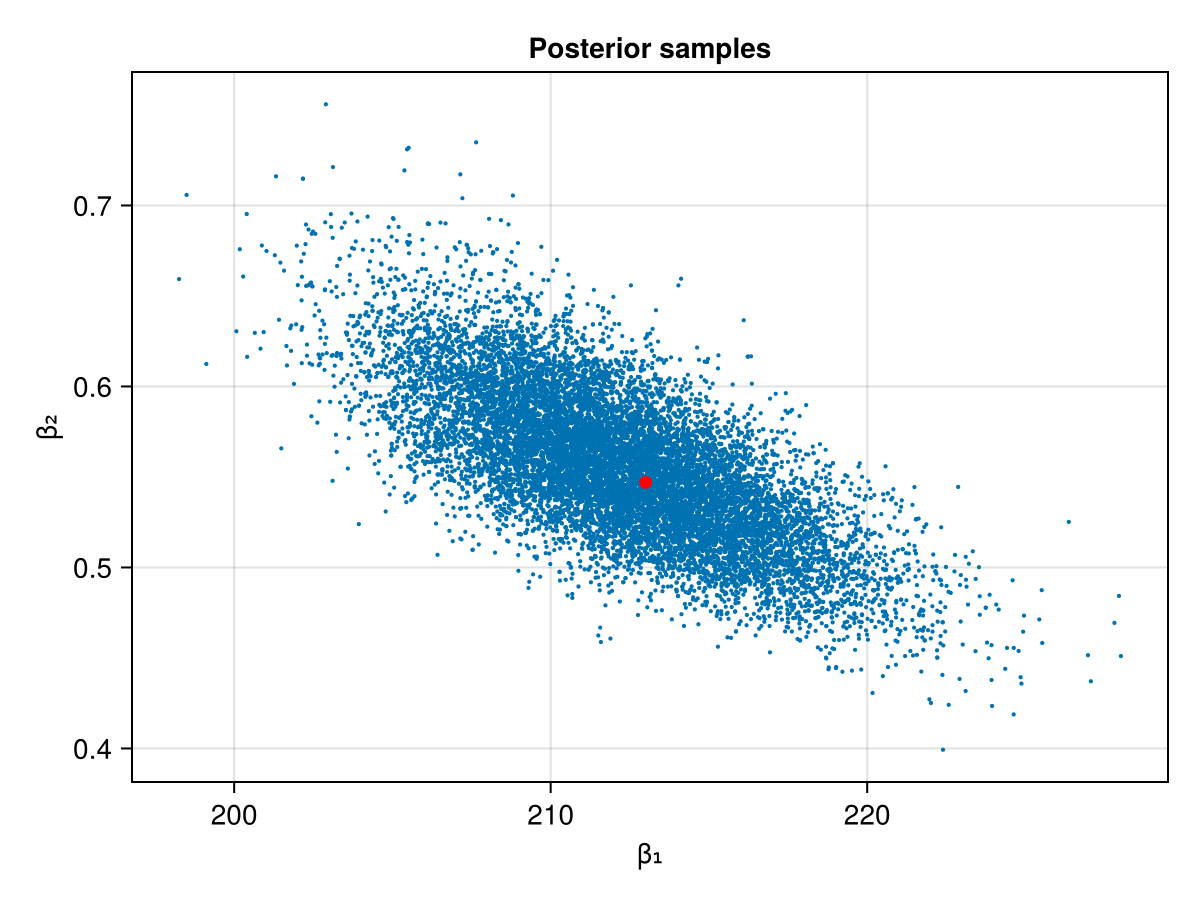

In [38]:
scatter(exp.(post_samples[:, 1]), exp.(post_samples[:, 2]), markersize = 3,
    axis = (title = "Posterior samples",xlabel = "β₁", ylabel = "β₂")
)
scatter!([β₁], [β₂], color = :red)
current_figure()

Let's summarise results

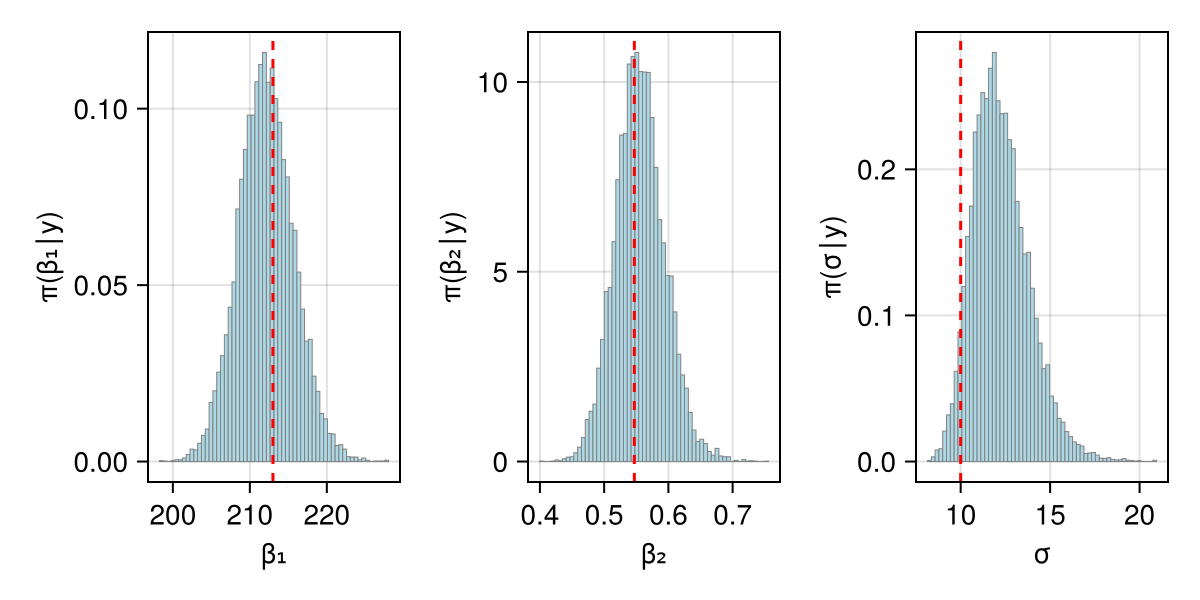

In [39]:
fig = Figure(size = (600, 300))
ax1 = Axis(fig[1,1], xlabel = "β₁", ylabel = "π(β₁∣y)")
hist!(ax1, exp.(post_samples[:, 1]), bins = 60, normalization = :pdf,
    strokewidth = 0.5, strokecolor = :gray, color = :lightblue,
    label = "samples")
vlines!(ax1, [β₁], color = :red, linestyle = :dash)
ax2 = Axis(fig[1,2], xlabel = "β₂", ylabel = "π(β₂∣y)")
hist!(ax2, exp.(post_samples[:, 2]), bins = 60, normalization = :pdf,
    strokewidth = 0.5, strokecolor = :gray, color = :lightblue,
    label = "samples")
vlines!(ax2, [β₂], color = :red, linestyle = :dash)
ax3 = Axis(fig[1,3], xlabel = "σ", ylabel = "π(σ∣y)")
hist!(ax3, exp.(post_samples[:, 3]), bins = 60, normalization = :pdf,
    strokewidth = 0.5, strokecolor = :gray, color = :lightblue,
    label = "samples")
vlines!(ax3, [10], color = :red, linestyle = :dash)
fig

In [40]:
α = 0.05
quantile(exp.(post_samples[:, 1]), [α/2, 0.5, 1-α/2])

3-element Vector{Float64}:
 205.2120746387292
 212.06369718552784
 219.47696175058593

In [41]:
quantile(exp.(post_samples[:, 2]), [α/2, 0.5, 1-α/2])

3-element Vector{Float64}:
 0.48347230837023714
 0.5547932712125674
 0.6342890189561283

In [42]:
quantile(exp.(post_samples[:, 3]), [α/2, 0.5, 1-α/2])

3-element Vector{Float64}:
  9.650791385826697
 12.07624748981624
 15.791032847060572

In [43]:
nonlinear_pred(θ) = rand.(Normal.(exp(θ[1]) * (1 .- exp.(-exp(θ[2]) * t)), exp(θ[3])))
ypred = hcat(map(nonlinear_pred, eachrow(post_samples[1:10:end, :]))...)

34×1601 Matrix{Float64}:
  -9.13181   13.9504   16.5356  -29.7323  …   26.4604  -15.3284   10.2696
  16.659     38.2862   32.1377   41.281       30.0145   23.3169   22.3279
  35.7355    52.0803   58.9807   55.1598      50.7685   36.6055   68.9534
  77.72     102.185    92.869    78.241       79.2525   94.9433   83.1592
 123.621    106.07    106.636    94.7453     120.453   101.87     96.2361
 104.559    110.678    89.1282  117.008   …   79.903   126.173   104.998
 128.671    120.966   133.106   145.321      113.957   134.618   125.832
 156.196    135.359   130.156   156.221      133.641   146.702   132.144
 163.161    142.244   191.873   153.282      151.908   149.485   146.695
 138.807    191.863   151.641   160.415      174.312   155.093   138.792
   ⋮                                      ⋱                        ⋮
 203.659    225.714   230.571   202.44    …  185.462   195.454   201.553
 215.453    221.743   199.287   228.565      205.505   205.265   222.315
 202.648    206.44    208

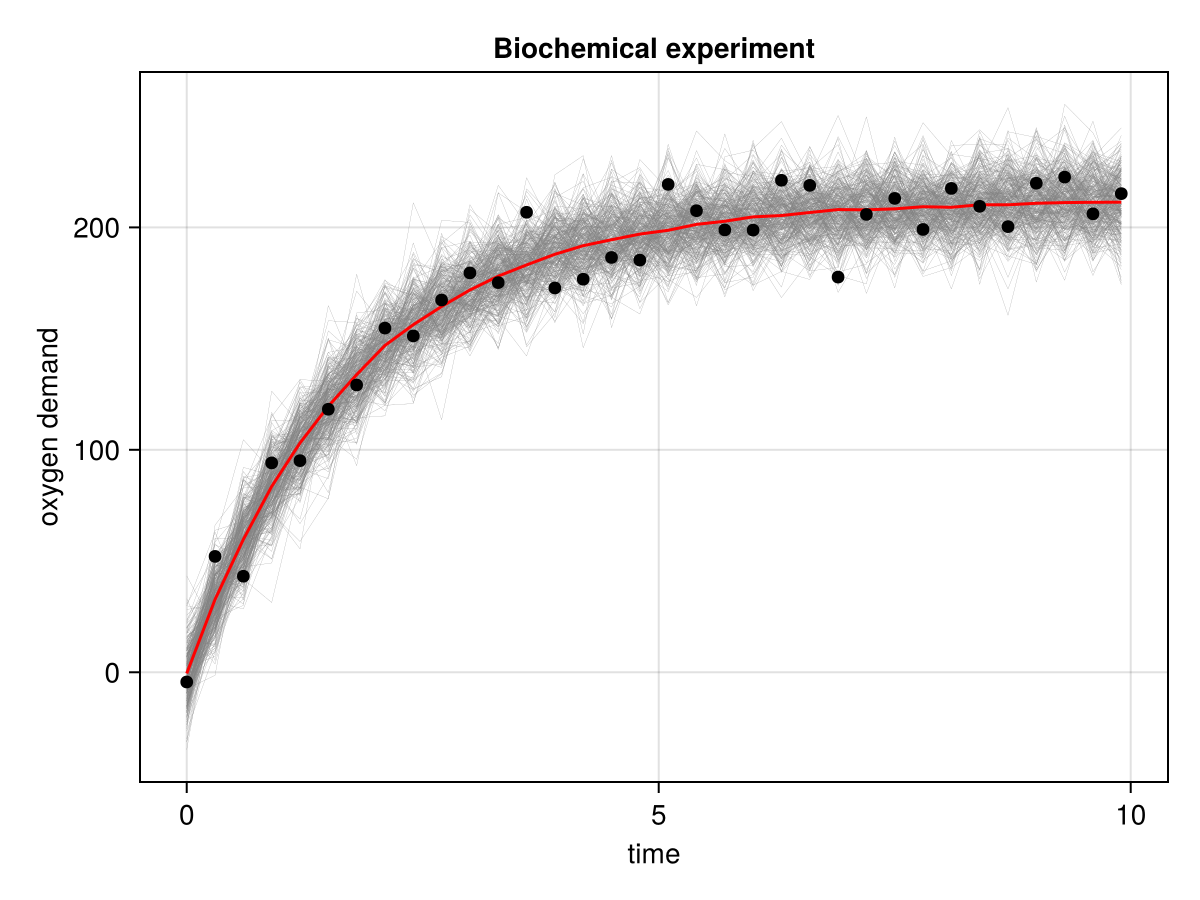

In [44]:
axis_args = (title = "Biochemical experiment", xlabel = "time", ylabel = "oxygen demand")
series(t, ypred[:, 1:5:end]', solid_color = :gray, linewidth = 0.1, axis = axis_args)
lines!(t, vec(mean(ypred, dims = 2)), color = :red, label = "E[Y∣ y]")
scatter!(t, y, color = :black)
current_figure()

## Hamiltonian Monte Carlo

In [45]:
using Distributions
using CairoMakie
using Random
using LinearAlgebra
using Turing

### Bayesian non-linear regression

Oxygen demand in a biochemical experiment with respect to incubation time.

#### Simulate data

In [46]:
Random.seed!(7)
β₁ = 213
β₂ = 0.547
t = 0:0.3:10
μ = β₁ * (1 .- exp.(-β₂* t))
y = rand.(Normal.(μ, 10))

34-element Vector{Float64}:
  -4.367936713637636
  52.09225149914346
  43.168590664661856
  94.11372002086921
  95.13319196287249
 118.24127279729844
 129.1360924664598
 154.72990876882017
 151.20905282609252
 167.34973240283415
   ⋮
 213.0202460483946
 199.06387865208757
 217.51618680273899
 209.4661825299886
 200.33064323826082
 219.84041176254982
 222.59068299483909
 206.08936083652785
 215.1610992574492

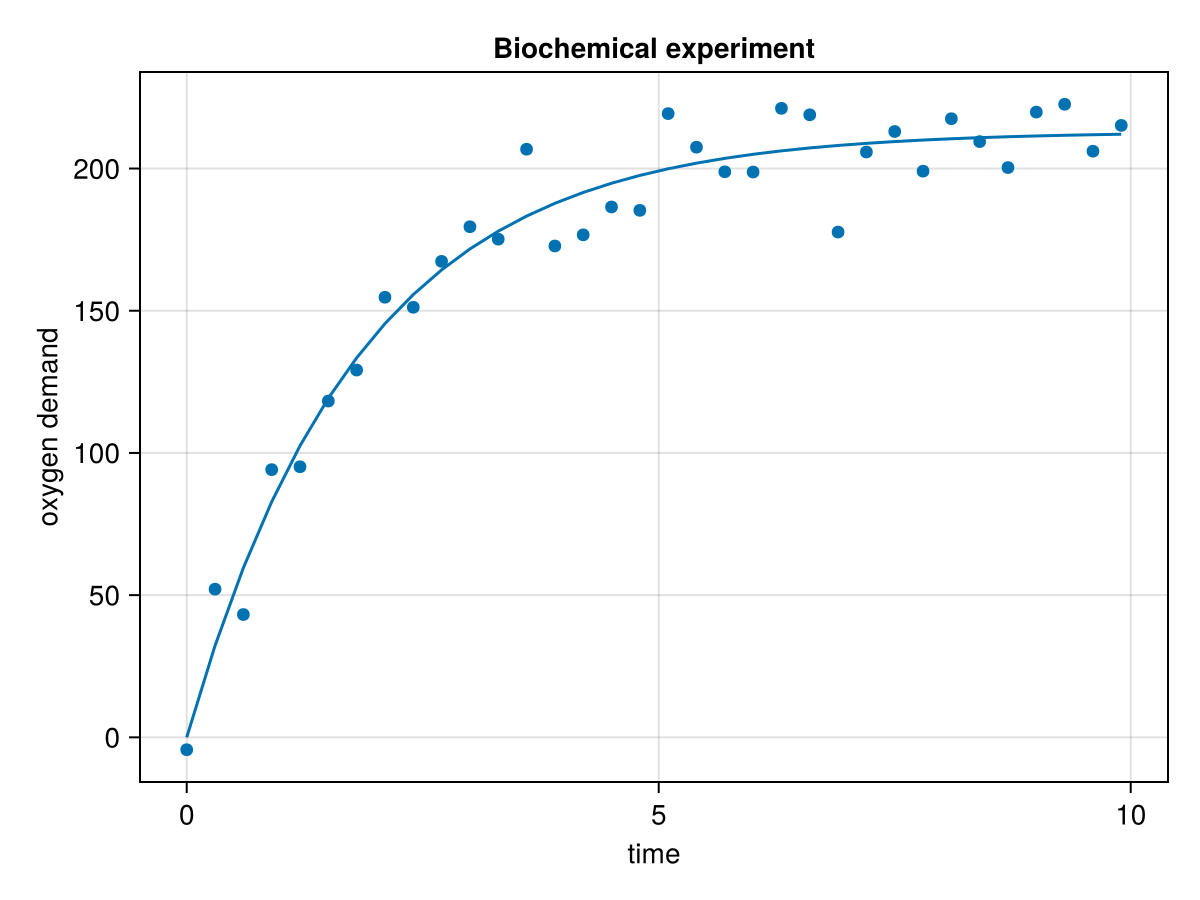

In [47]:
axis_args = (title = "Biochemical experiment", xlabel = "time", ylabel = "oxygen demand")
lines(t, μ, axis = axis_args)
scatter!(t, y)
current_figure()

#### Sample from posterior

Define the Bayesian model.

In [48]:
@model function nonlinear(y, t, n)
    β₁ ~ LogNormal()
    β₂ ~ LogNormal()
    σ ~ LogNormal()

    # likelihood
    for i in 1:n
        y[i] ~ Normal(β₁ * (1 .- exp.(-β₂* t[i])), σ)
    end
end

nonlinear (generic function with 2 methods)

Evaluate the model in the data.

In [49]:
m1 = nonlinear(y, collect(t), length(y))

DynamicPPL.Model{typeof(Main.var"##283".nonlinear), (:y, :t, :n), (), (), Tuple{Vector{Float64}, Vector{Float64}, Int64}, Tuple{}, DynamicPPL.DefaultContext}(Main.var"##283".nonlinear, (y = [-4.367936713637636, 52.09225149914346, 43.168590664661856, 94.11372002086921, 95.13319196287249, 118.24127279729844, 129.1360924664598, 154.72990876882017, 151.20905282609252, 167.34973240283415  …  205.811445086745, 213.0202460483946, 199.06387865208757, 217.51618680273899, 209.4661825299886, 200.33064323826082, 219.84041176254982, 222.59068299483909, 206.08936083652785, 215.1610992574492], t = [0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7  …  7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9.0, 9.3, 9.6, 9.9], n = 34), NamedTuple(), DynamicPPL.DefaultContext())

Sample from the posterior distribution using MCMC.

In [50]:
chain = Turing.sample(m1, NUTS(0.65), 3000)

Sampling   0%|                                          |  ETA: N/A
┌ Info: Found initial step size
└   ϵ = 0.0001953125
Sampling   0%|▎                                         |  ETA: 0:20:15
Sampling   1%|▍                                         |  ETA: 0:10:06
Sampling   2%|▋                                         |  ETA: 0:06:42
Sampling   2%|▉                                         |  ETA: 0:05:00
Sampling   2%|█                                         |  ETA: 0:03:59
Sampling   3%|█▎                                        |  ETA: 0:03:18
Sampling   4%|█▌                                        |  ETA: 0:02:49
Sampling   4%|█▋                                        |  ETA: 0:02:27
Sampling   4%|█▉                                        |  ETA: 0:02:10
Sampling   5%|██▏                                       |  ETA: 0:01:57
Sampling   6%|██▎                                       |  ETA: 0:01:45
Sampling   6%|██▌                                       |  ETA: 0:01:36
Sampling   6%|█

Chains MCMC chain (3000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:4000
Number of chains  = 1
Samples per chain = 3000
Wall duration     = 7.44 seconds
Compute duration  = 7.44 seconds
parameters        = β₁, β₂, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Use `describe(chains)` for summary statistics and quantiles.


Visualise traceplot and density of the posterior.

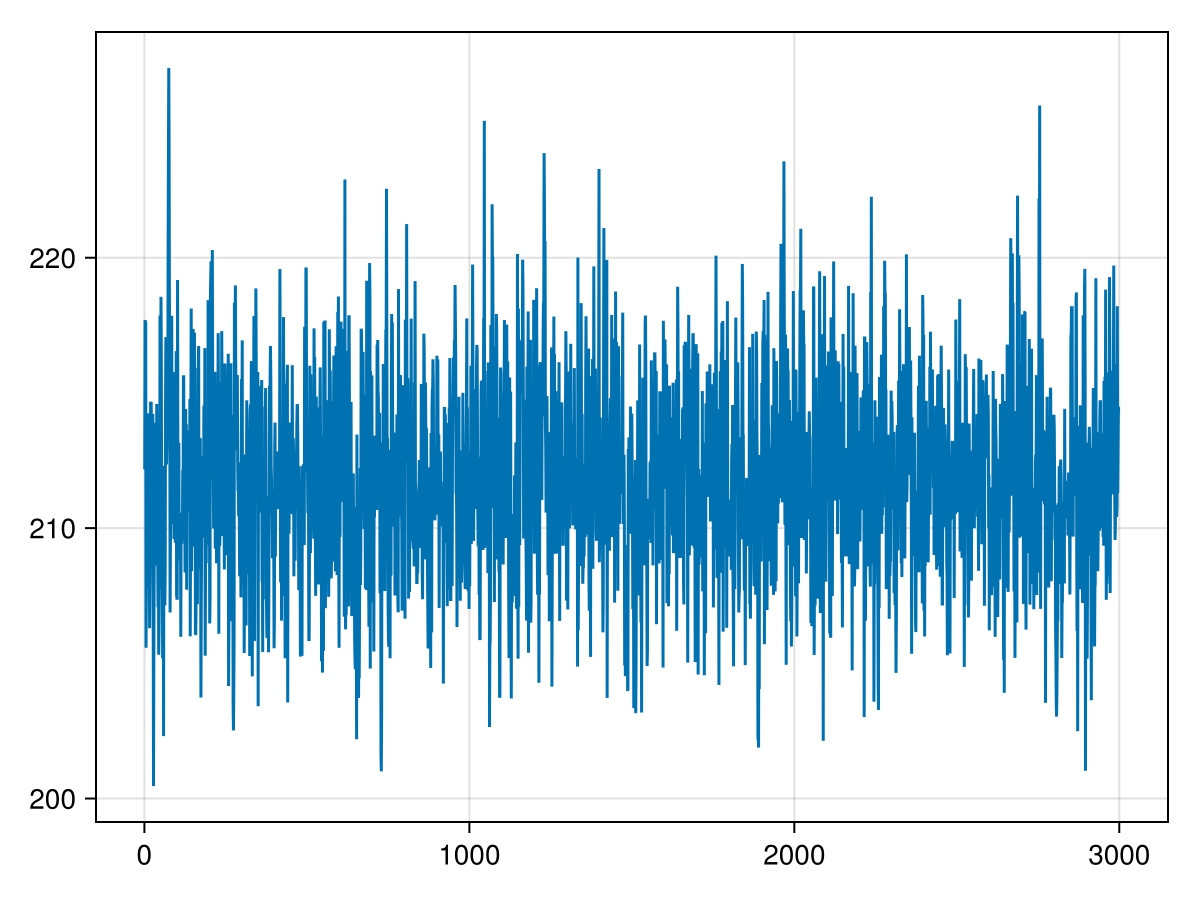

In [51]:
postsamples = vec(get(chain, :β₁)[1])
lines(postsamples)

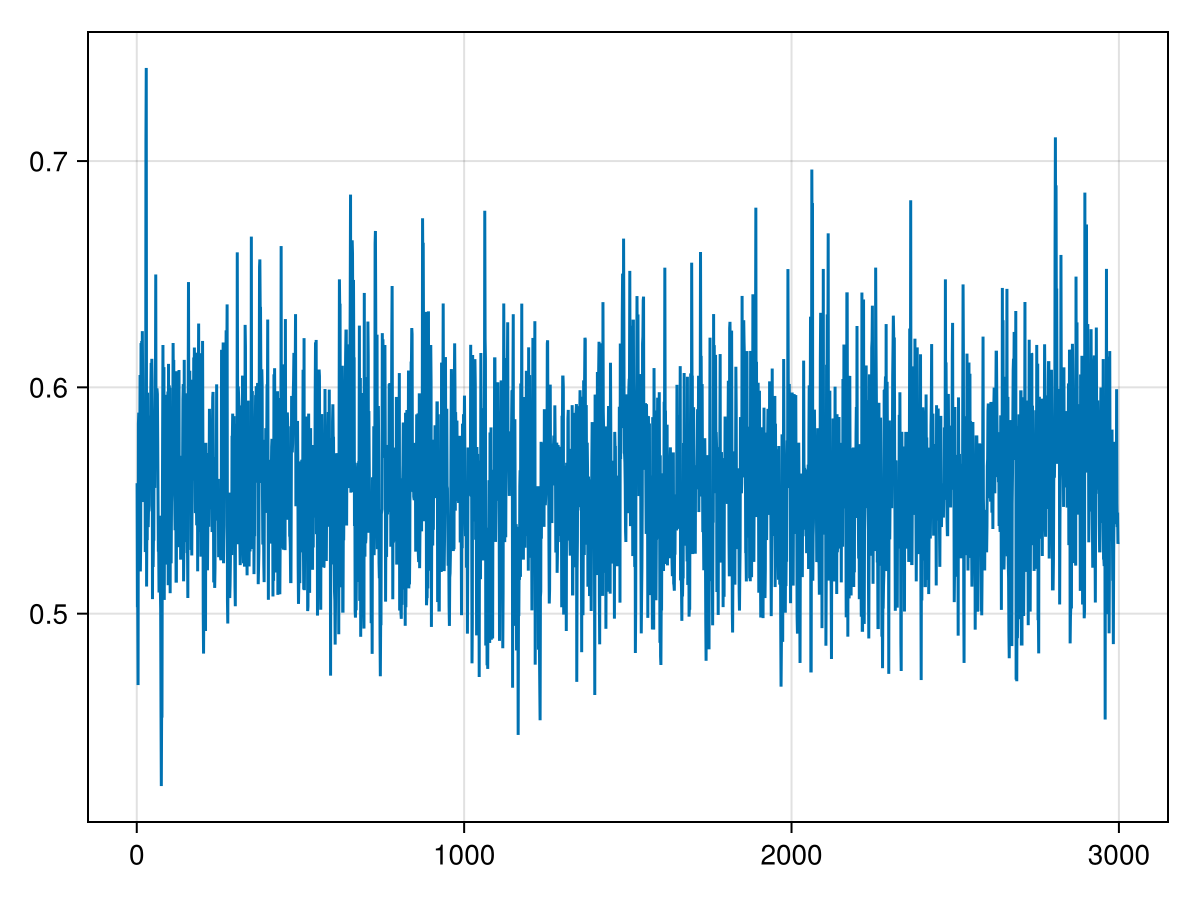

In [52]:
postsamples = vec(get(chain, :β₂)[1])
lines(postsamples)

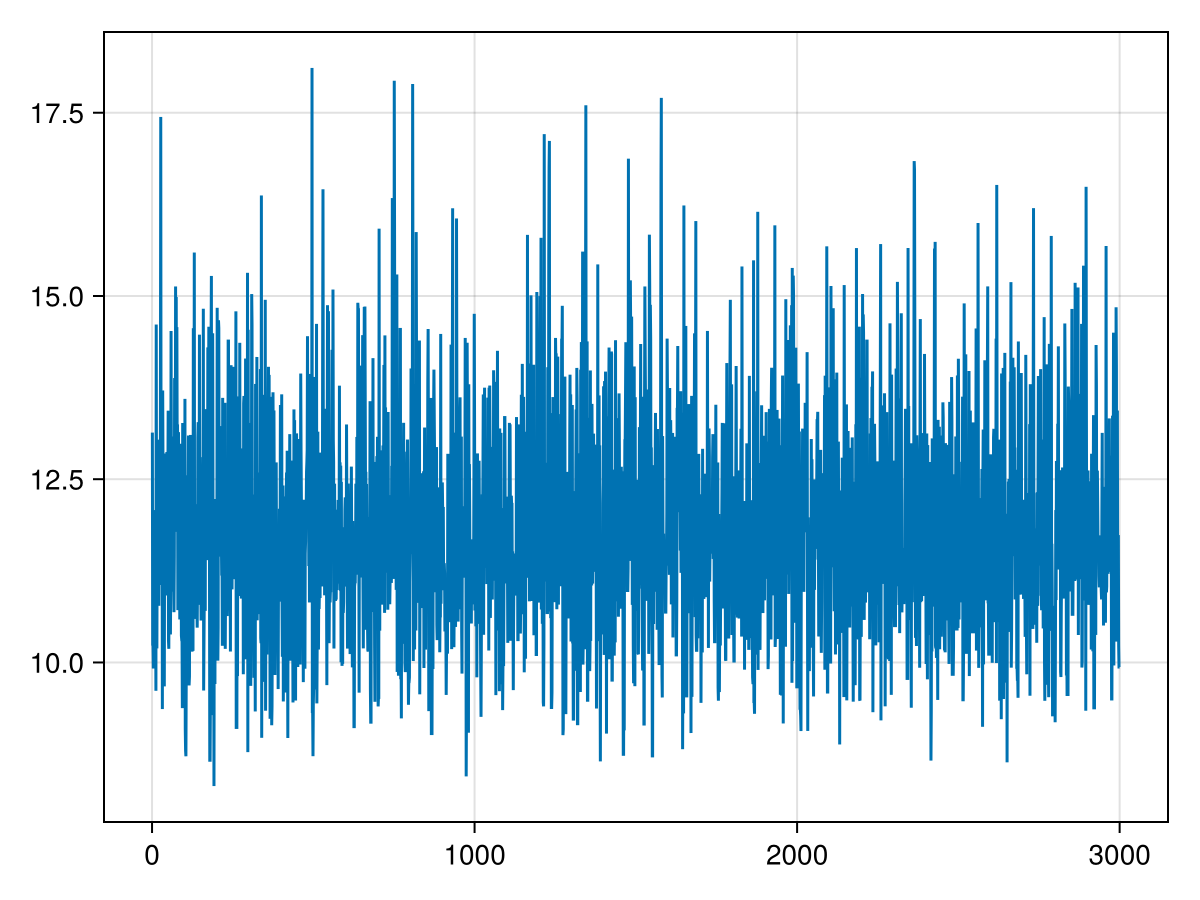

In [53]:
postsamples = vec(get(chain, :σ)[1])
lines(postsamples)

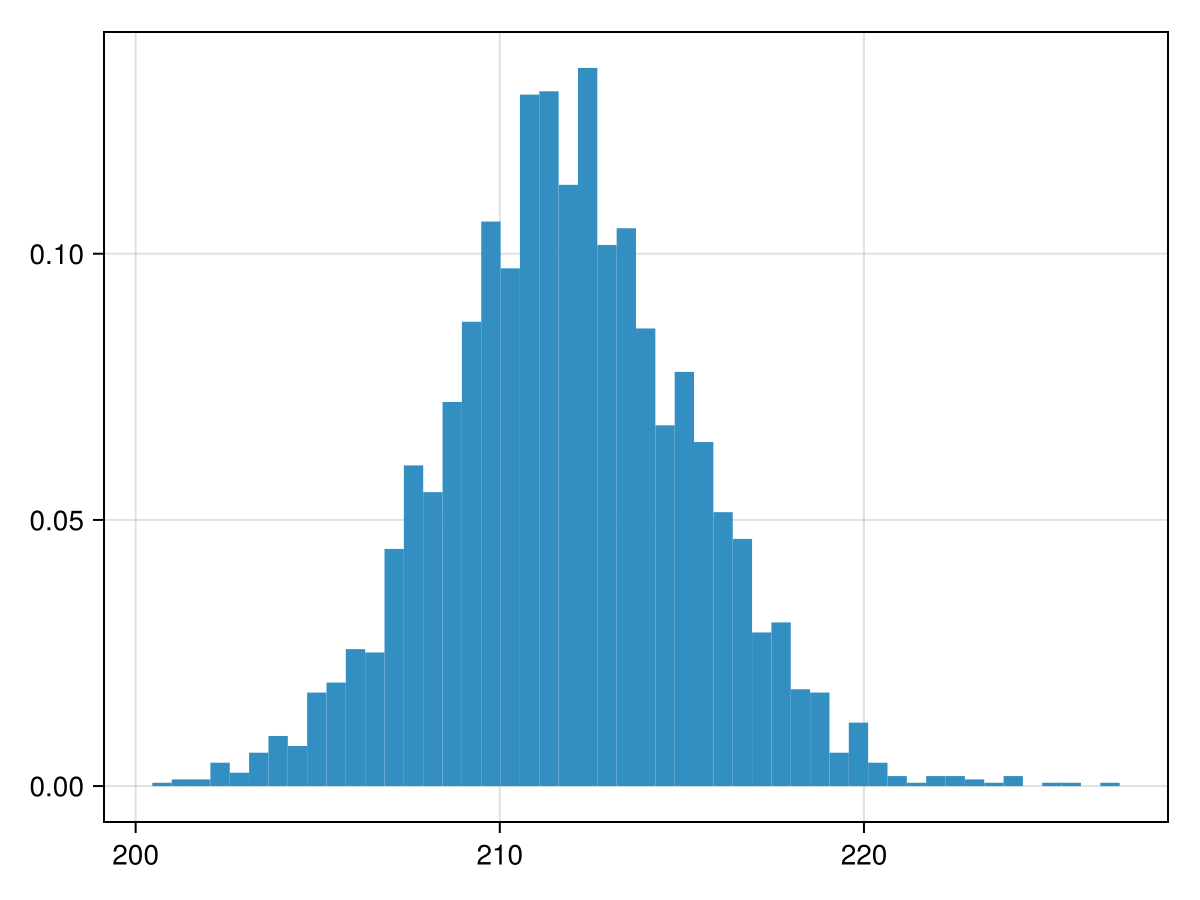

In [54]:
postsamples = vec(get(chain, :β₁)[1])
hist(postsamples, bins = 50, normalization = :pdf)

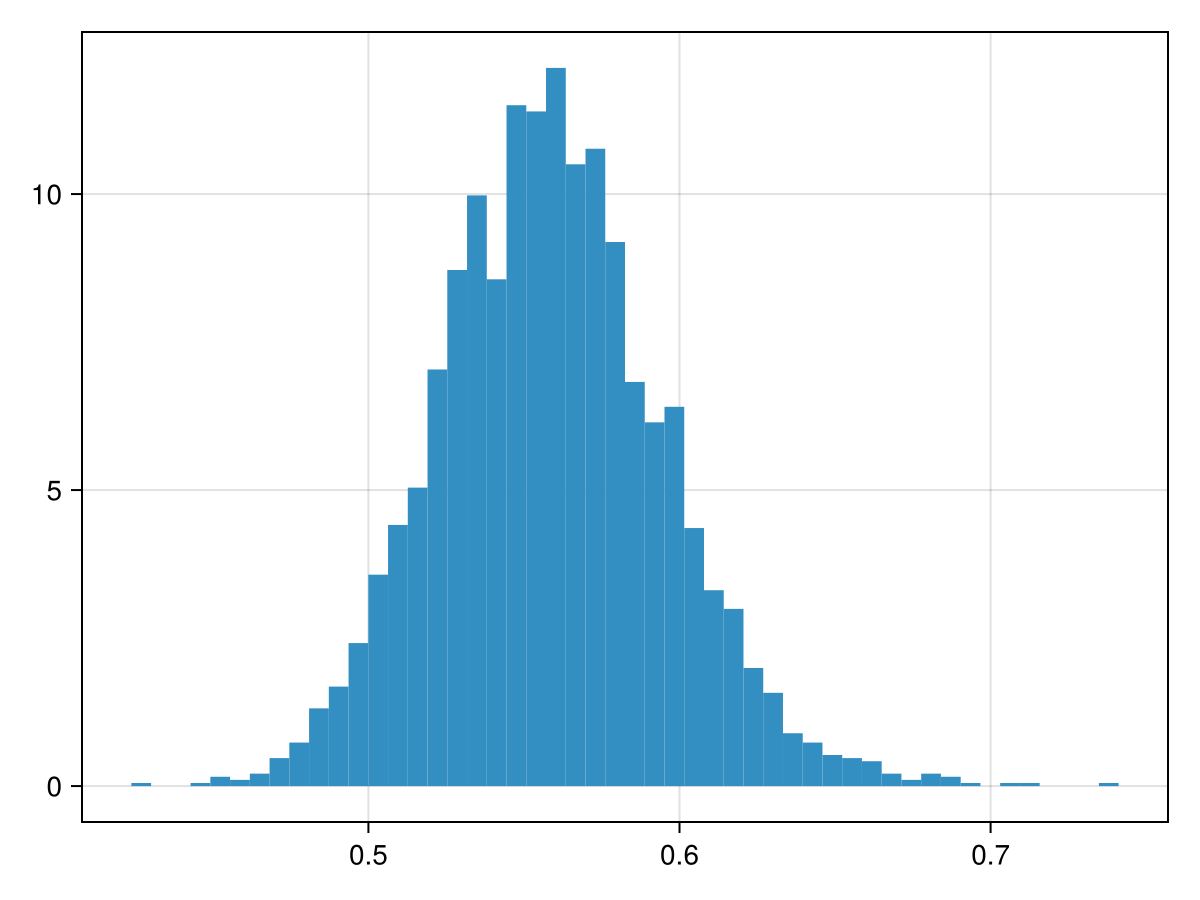

In [55]:
postsamples = vec(get(chain, :β₂)[1])
hist(postsamples, bins = 50, normalization = :pdf)

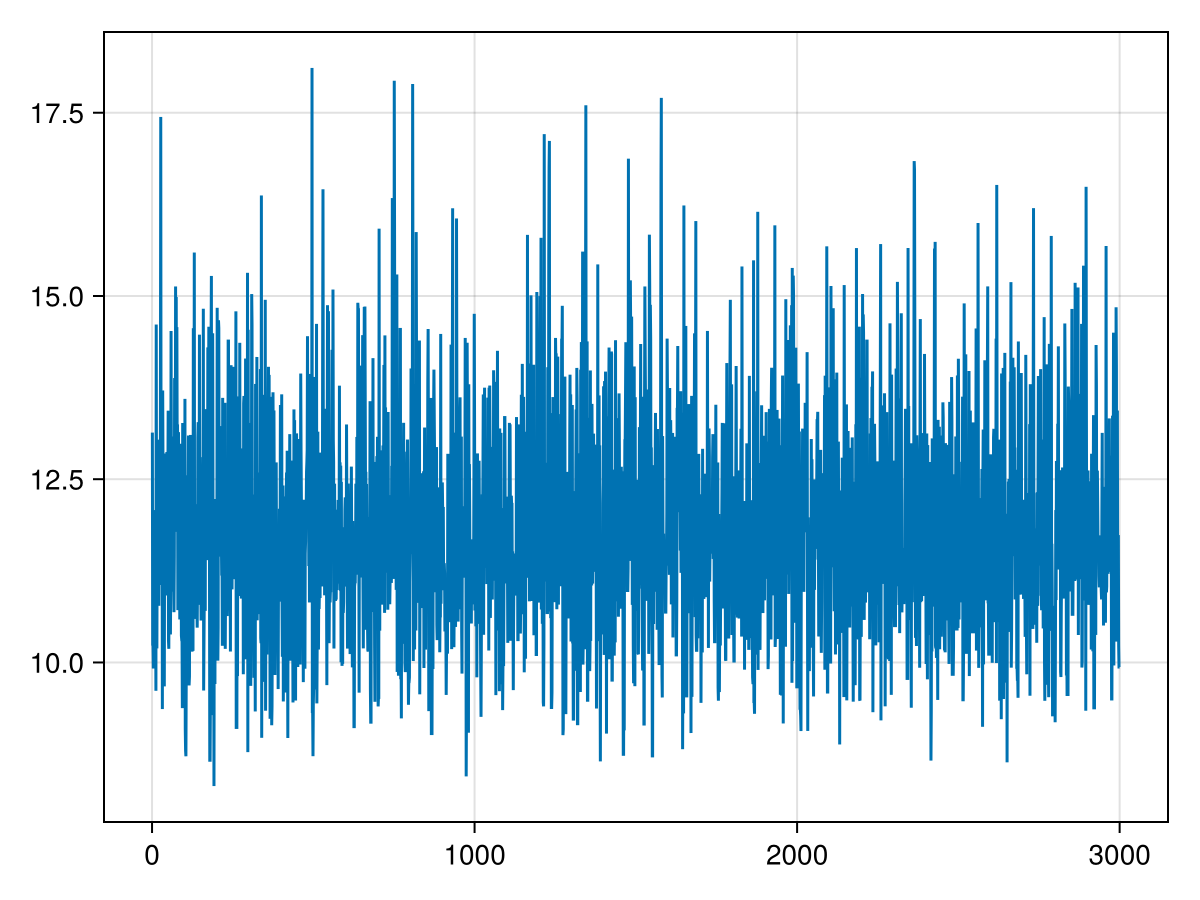

In [56]:
postsamples = vec(get(chain, :σ)[1])
lines(postsamples)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*